<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Environmental Effects of COVID-19
by Yap Yuan Xi

# Table of Content (with relevant hyperlinks to sections)

- [Motivation and Background](#Motivation-and-Background)
- [Research Questions](#Research-Questions)
- [Datasets](#Datasets)
- [Methodology](#Methodology)
- [Results Discussion](#Results-Discussion)
- [Appendix](#Appendix)

# Motivation and Background

Recently on the news, I saw a lot more articles related to natural disasters and climate change movements. For this sudden spike in natural disasters to happen admist the COVID-19 pandemic, I found it too coincidental. Not only that, there are many new weather records set in this COVID-19 period. July 2021 breaking the record of hottest recorded month is one such example.
Therefore, I decided to take matters into my own hands and confirm if the pandemic is related to this strange spikes.

# Research Questions

<font size = 3><u>*Looking at individual countries,*</u></font>
1. Are lockdowns causing more CO<sub>2</sub> emissions?
   - Most countries analysed showed a significant decrease during the initial lockdown period (Jan 2021 - April 2021)
   - After that initial drop, some countries showed moderate negative correlation between lockdown severity and carbon emissions
   - This means that lockdowns are reducing carbon emissions, for some countries.
2. Are lockdowns increasing deforestation?
   - No, lockdowns and deforestation are completely unrelated at all.

<font size = 3><u>*Looking at the world as a whole,*</u></font>
1. Does lockdowns increase global temperatures?
   - No, global temperature is not even correlated with the severity of lockdowns at all.
   - They are independent of each other even on a country wide scale
2. Are lockdowns causing more air pollution?
   - There exists no correlation with lockdowns and air pollution

<div class="alert alert-block alert-info">
<b>Side Note:</b> There is a reason for splitting up the questions into 2 categories, one which I will analyse each country individually and one where I just analyse the world as a whole.
This is due to the fact that the variables measured are not just affected by their own country but by others too.<br>
For example, air pollution in Singapore could be due to Indonesia's slash-and-burn practices and the smoke got blown by the wind into Singapore.
However, variables like carbon emissions depend solely on the country's handling of the situation, and can thus be analysed independently.
</div>

# Datasets

1. [Global Temperature](#Global-Temperature)
2. [COVID Lockdown Severity](#COVID-Lockdown-Severity) 
3. [Carbon Emissions](#Carbon-Emissions)
4. [Forest Area Change](#Forest-area-Change)
5. [Air Quality Index](#Air-Quality-Index)
6. [Natural Disaster Records](#Natural-Disaster-Records)
7. [Country Codes and Names](#Country-Codes-and-Names)

In [1]:
# The python libraries used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import re
import plotly.express as px
import folium

In [2]:
# Default Plot Parameters
plt.rcParams['figure.edgecolor'] = 'black'

## Global Temperature 
Data Source: [Climate Change Knowledge Portal](https://climateknowledgeportal.worldbank.org/)

The temperature is measured in degree Celsius, averaged for each month. The data ranges from 1991 January to 2020 December.

In [3]:
# Cleaning the file cos it is autistic
# It has , in the data, messing with pandas read_csv() function
with open("temperatures.csv", "r") as infile: # The csv input
    with open("temp_cleaned.csv", "w") as out: # Outout another csv that is error free
        # Replacing the random , in data with ; using the power of regex
        out.write(re.sub(
            "((.*?,){3})(.*?),(.*?,)(.*)",
            "\\1\\3;\\4\\5",
            infile.read()
        ))


In [4]:
# Reading the cleaned file
df_temp = pd.read_csv("temp_cleaned.csv")

# Stripping some values to make life easier
df_temp.columns = df_temp.columns.str.strip()
df_temp.Country = df_temp.Country.str.strip()

# Fixing those funny values consisting of ; as changed from above
df_temp.replace(
    {
        "Bahamas; The"                              : "Bahamas", 
        "Gambia; The"                               : "The Gambia", 
        "Korea; Democratic People's Republic of"    : "North Korea", 
        "Korea; Republic of"                        : "South Korea", 
        "Tanzania; United Republic of"              : "Tanzania"
    },
    inplace = True
)

# Joining the month and the year
df_temp.Year = pd.to_datetime(df_temp.Year.astype(str) + df_temp.Statistics.str[0:4])

# Offsetting to the end of the month
df_temp.Year += pd.tseries.offsets.MonthEnd(1)

# Dropping the useless column
df_temp.drop(columns = ["Statistics"], inplace = True)

# Renaming the Columns
df_temp.columns = ["Temp", "Date", "Country", "ISO3"]

df_temp.tail(5)

Temp       Date   Country  ISO3
71275  18.7 2020-08-31  Zimbabwe   ZWE
71276  22.0 2020-09-30  Zimbabwe   ZWE
71277  24.3 2020-10-31  Zimbabwe   ZWE
71278  26.2 2020-11-30  Zimbabwe   ZWE
71279  24.6 2020-12-31  Zimbabwe   ZWE

## COVID Lockdown Severity
Data Source: [Our World In Data](https://ourworldindata.org/grapher/covid-stringency-index)

The COVID Stringency Index is a measure of the severity of the lockdown imposed by the country.
This index is used instead of the number of COVID-19 cases as I believe that it is our actions against COVID that causes the envionmental harm instead of the COVID virus itself.

In [5]:
df_Lockdown_Severity = pd.read_csv("covid-stringency-index.csv")

# Setting the Day as Date
df_Lockdown_Severity.Day = pd.to_datetime(df_Lockdown_Severity.Day, format = "%Y-%m-%d")

# Renaming the columns
df_Lockdown_Severity.columns = ["Country", "ISO", "Date", "Lockdown Severity"]

df_Lockdown_Severity.head()

Country  ISO       Date  Lockdown Severity
0  Afghanistan  AFG 2020-01-21                0.0
1  Afghanistan  AFG 2020-01-22                0.0
2  Afghanistan  AFG 2020-01-23                0.0
3  Afghanistan  AFG 2020-01-24                0.0
4  Afghanistan  AFG 2020-01-25                0.0

## Carbon Emissions
Data Source: [Carbon Monitor Initiative](https://carbonmonitor.org/)

The data here greatly generalises certain countries as it does not monitor every country individually. There is a few data points with country set as "ROW" and "EU27 & UK". "ROW" here means "Rest of the World" and "EU27" stands for the 27 countries in the europeon union. However, this dataset still has monthly data in 2019 and daily data since 2020.

The emissions are measured in Megatonnes (Mt)

In [6]:
df_CarbonEmissions = pd.read_csv("carbonmonitor-global_datas_2021-09-08.csv")

# Setting the date as an actual date value
df_CarbonEmissions.date = pd.to_datetime(df_CarbonEmissions.date, format = "%d/%m/%Y")

# Dropping the timestamp, we only require date
df_CarbonEmissions.drop(columns = ["timestamp"], inplace = True)

# Renaming the columns
df_CarbonEmissions.columns = ["Country", "Date", "Sector", "Emissions"]

# Renaming WORLD to World
df_CarbonEmissions.Country.replace({"WORLD": "World"}, inplace = True)

# Adding a total Sector
df_CarbonEmissions = df_CarbonEmissions.append(
    df_CarbonEmissions.groupby(["Country", "Date"]).Emissions.sum().reset_index() # Calculating the total
)
# As the appended data is the only nan value in the entire column
df_CarbonEmissions.Sector.fillna("Total", inplace = True)

# Renaming some funny country names
df_CarbonEmissions.Country.replace({
    "US": "United States",
    "UK": "United Kingdom"
}, inplace = True)

df_CarbonEmissions.head()

Country       Date Sector  Emissions
0     Brazil 2019-01-01  Power   0.108768
1      China 2019-01-01  Power  14.251000
2  EU27 & UK 2019-01-01  Power   1.676920
3     France 2019-01-01  Power   0.049075
4    Germany 2019-01-01  Power   0.349691

## Forest Area Change
Data Source: [Our World in Data](https://ourworldindata.org/grapher/forest-area-km?country=~OWID_WRL)

The data given is the forest area in hectares of every country at the end of every year from 1990 to 2020.

In [7]:
df_forest = pd.read_csv("forest-area-km.csv")

# Set to end of year
df_forest.Year = df_forest.Year.map("{}-12-31".format)
df_forest.Year = pd.to_datetime(df_forest.Year, format = "%Y-%m-%d")

# Renaming the columns
df_forest.columns = ["Country", "ISO3", "Date", "Forest Area"]

df_forest.head()

Country ISO3       Date  Forest Area
0  Afghanistan  AFG 1990-12-31    1208440.0
1  Afghanistan  AFG 1991-12-31    1208440.0
2  Afghanistan  AFG 1992-12-31    1208440.0
3  Afghanistan  AFG 1993-12-31    1208440.0
4  Afghanistan  AFG 1994-12-31    1208440.0

## Air Quality Index
Data Source: [The World Air Quality Project](https://aqicn.org/data-platform/register/)

The air quality given is known as the "Individual pollutant" Air Quality index. This means that each pollutant (CO, O<sub>3</sub>, NO, PM<sub>2.5</sub>, PM<sub>10</sub>) will have a different Air Quality Index (AQI).
The overall AQI is the max of all these individual pollutants.

The data also included the temperature of the air

The data given is given in quarters, meaning for the year 2019 - 2020, there is 8 different csv files to read.
There is also one more for the current year 2021, making it a total of 9

In [8]:
# Empty Dataframe to append to
df_AQI = pd.DataFrame()

for i in [2019, 2020]: # For every year
    for j in [1, 2, 3, 4]: # For every quarter
        # Download the data from online
        df_AQI = df_AQI.append(pd.read_csv(f"waqi-covid19-airqualitydata-{i}Q{j}.csv", skiprows = range(0, 4)))

# Appending the data for the year 2021
df_AQI = df_AQI.append(pd.read_csv(f"waqi-covid19-airqualitydata-2021.csv", skiprows = range(0, 4)))

df_AQI.Date = pd.to_datetime(df_AQI.Date)

df_AQI.rename(columns = {
    "Country": "ISO2",
    "Specie": "Type"
}, inplace = True)

df_AQI.head(5)

Date ISO2       City  Type  count    min    max  median  variance
0 2019-01-16   AE  Abu Dhabi  pm10     24   86.0   99.0    97.0    179.40
1 2019-01-22   AE  Abu Dhabi  pm10     24   51.0   57.0    55.0     23.75
2 2019-01-26   AE  Abu Dhabi  pm10     24  136.0  173.0   160.0    941.96
3 2019-01-07   AE  Abu Dhabi  pm10     24   60.0   91.0    72.0   1006.88
4 2019-01-10   AE  Abu Dhabi  pm10     24   82.0   93.0    87.0     57.97

## Natural Disaster Records
Data Source: [Emergency Event Database](https://www.emdat.be/)

Only the natural disasters are downloaded from the records as those are the indicators of environmental distruction.
The others categories of disasters (Technological and Complex), are caused by humans, and do not count.

The data given is the records of every disaster from 1900 to today (23 Sept 2021)

In [9]:
df_disaster = pd.read_excel("emdat-data_2021_09_23.xlsx", header = 6)

# Dropping all excess/little data columns
df_disaster.drop(inplace = True, columns = ["Dis No", "Seq", 'Glide', 'Disaster Group', 'Event Name', 'Origin', "Associated Dis", "Associated Dis2", "OFDA Response", "Appeal", "Declaration", "Aid Contribution", "Dis Mag Value", "Dis Mag Scale", "Local Time", "River Basin", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day", "Reconstruction Costs ('000 US$)", "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI', "Adm Level", "Admin1 Code", "Admin2 Code", "Geo Locations"])

df_disaster.head()

C:\Users\yuanx\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Year Disaster Subgroup      Disaster Type Disaster Subtype  \
0  1900    Climatological            Drought          Drought   
1  1900    Climatological            Drought          Drought   
2  1902       Geophysical         Earthquake  Ground movement   
3  1902       Geophysical  Volcanic activity         Ash fall   
4  1902       Geophysical  Volcanic activity         Ash fall   

  Disaster Subsubtype     Country  ISO           Region Continent  \
0                 NaN  Cabo Verde  CPV   Western Africa    Africa   
1                 NaN       India  IND    Southern Asia      Asia   
2                 NaN   Guatemala  GTM  Central America  Americas   
3                 NaN   Guatemala  GTM  Central America  Americas   
4                 NaN   Guatemala  GTM  Central America  Americas   

                    Location Latitude Longitude  Total Deaths  No Injured  \
0                Countrywide      NaN       NaN       11000.0         NaN   
1                     Bengal      NaN       NaN     1250000.0         NaN   
2  Quezaltenango, San Marcos       14       -91        2000.0         NaN   
3                        NaN      NaN       NaN        1000.0         NaN   
4                        NaN      NaN       NaN        6000.0         NaN   

   No Affected  No Homeless  Total Affected  
0          NaN          NaN             NaN  
1          NaN          NaN             NaN  
2          NaN          NaN             NaN  
3          NaN          NaN             NaN  
4          NaN          NaN             NaN

## Country Codes and Names
Data Source: [GeoNames](https://www.geonames.org/countries/)

This is for ease of data cleaning, as countries are named and called differently.\
It was not used explicitly, but it helped in standardizing the names of countries and their codes during data cleaning.

In [10]:
import ssl
# For some reason this is insecure, so this is set to bypass that restriction
ssl._create_default_https_context = ssl._create_unverified_context

df_can = pd.read_html("https://www.geonames.org/countries/")[1]
df_can.drop(columns = ["fips", "Capital", 'Area in km²', "Population", "Continent"], inplace = True)

df_can.columns = ['ISO2', "ISO3", "ISO ID", "Country"]

df_can.head()

ISO2 ISO3  ISO ID               Country
0   AD  AND      20               Andorra
1   AE  ARE     784  United Arab Emirates
2   AF  AFG       4           Afghanistan
3   AG  ATG      28   Antigua and Barbuda
4   AI  AIA     660              Anguilla

# Methodology

In this section, we will perform the EDA on the data to attempt to answer each question.\
The qualitative analysis will be given under [Results Discussion](#results-discussion)

The data cleaning was done in the previous section, and the rational is explained in the code comments

You should demonstrate the data science life cycle here (from data acquisition to cleaning to EDA and analysis etc).
For data cleaning, be clear in which dataset (or variables) are used, what has been done for missing data, how was merging performed, explanation of data transformation (if any).
If data is calculated or summarized from the raw dataset, explain the rationale and steps clearly.

<font size = 4><u>*Country-Level Analysis*</u></font>

1. [<font size = 3>Are lockdowns causing more CO<sub>2</sub> emissions?</font>](#Q1)
2. [<font size = 3>Are lockdowns increasing deforestation?</font>](#Q2)

<font size = 4><u>*World-Level Analysis*</u></font>

1. [<font size = 3>Does lockdowns increase global temperatures?</font>](#Q3)
2. [<font size = 3>Are lockdowns causing more air pollution?</font>](#Q4)

<a id="Q1"></a>
## **Are lockdowns causing more CO<sub>2</sub> emissions?**

Firstly, I created a function to plot the graphs of every sector and the lockdown severity index of the country against time. \
This function is used for every country for individual analysis. \
This allows us to see an overview of the data, and to get a hint certain relationships.

Secondly, I also added a faint red highlight to the plot. \
This was because, I noticed a significant drop occuring in most of the graphs, all occuring at about the same time. \
The periods with the drops is thus highlighted red, which somehow always coincides with the initial pandemic period. \
The initial pandemic period is when the lockdown severity increases from 0 sharply. \
This region is found using the plots drawn and will be elaborated in [Results Discussion](#results-discussion)

Thirdly, A plot of lockdown severity against emissions is created. \
The values used will be after the initial spike, which marks the start of the pandemic.

Due to the CO<sub>2</sub> emissions dataset grouping regions, I only have access to these 11 countries without loss of details:
- [Brazil](#Brazil-EDA)
- [China](#China-EDA)
- [France](#France-EDA)
- [Germany](#Germany-EDA)
- [India](#India-EDA)
- [Italy](#Italy-EDA)
- [Japan](#Japan-EDA)
- [Russia](#Russia-EDA)
- [Spain](#Spain-EDA)
- [United Kingdom](#United-Kingdom-EDA)
- [United States](#United-States-EDA)
  
The rest are abstracted away as "ROW" (Rest of World) or "EU27 & UK" (Europeon Union with UK for some reason).

All 11 countries will be analysed individually in this segment, with relevent EDA done for the individual cases.

In [11]:
# Storing the initial period, r-values and its confidence
df_emissions_analysis = pd.DataFrame(columns = ["Country", "Start Date", "End Date", "CO2 Drop (Megatonnes)", "R-value", "Confidence"])

def emissionsAnalysis(
    country = None, 
    initial_start = "2020-01-01", # The initial pandemic period start time
    initial_end   = "2020-12-31", # The initial pandemic period end time
    window_size = 1,
    **kwargs # Plotting arguments
):
    """
    This function plots the carbon emissions categorised by the sector generating it against time
    The window size is the sliding window size to consider. Increase this number if data too fuzzy, i.e. constantly changing significantly
    It also plots the scatter plot of emissions against lockdown severity after the initial drop in emissions due to COVID
    """
    global df_emissions_analysis

    if country == None: country = "World"

    # List of sectors
    sectors = ['Domestic Aviation', 'Ground Transport', 'Industry', 'International Aviation', 'Power', 'Residential', 'Total']

    # The relevant data
    df = pd.merge( # Merging the carbon emissions with the data severity
        df_CarbonEmissions[df_CarbonEmissions.Country == country].pivot_table(index = 'Date', columns = 'Sector', values = 'Emissions'),
        df_Lockdown_Severity[df_Lockdown_Severity.Country == country] if country != "World"
        else df_Lockdown_Severity.groupby("Date").median().reset_index(),
        on = "Date",
        how = 'left'
    )

    # Converting string to datetime
    initial_start = pd.to_datetime(initial_start)
    initial_end = pd.to_datetime(initial_end)
    
    """
    This section is for plotting the subplots of every sector
    It uses the pandas library plot to plot the subplots
    """
    ax = df.fillna(0)\
    .set_index("Date")\
    .rolling(window_size).mean()\
    .plot( # Plotting it
        kind = 'line',
        subplots = True,
        layout = (len(sectors) // 2 + 1, 2),
        sharex = True,
        sharey = False,
        **kwargs
    )

    # Setting the title and colour the region
    for i, sector in enumerate(sectors):   
        # Titling
        ax[i // 2, i % 2].set_title(f"CO2 Emissions of {country} in {sector} Sector / Megatonnes")

        # Region Colouring
        ax[i // 2, i % 2].axvspan(
            xmin = initial_start, 
            xmax = initial_end,  
            color = 'r', 
            alpha = .05
        )

    # Title for the lockdown severity
    ax[len(sectors) // 2, len(sectors) % 2].set_title(f"Lockdown Severity of {country}")

    # Region Colouring for the lockdown severity graph
    ax[len(sectors) // 2, len(sectors) % 2]\
      .axvspan(
          xmin = initial_start, 
          xmax = initial_end,  
          color = 'r', 
          alpha = .05
      )

    """
    This section is plotting the scatterplot of emissions against lockdown severity
    A regression line and residual plot is added for the sake of it
    """

    # Creating a new figure
    plt.figure()
    plt.subplots(1, 3, figsize = (30, 8), sharex = True)

    # The scatter and regression
    sns.regplot(
        data = df[df.Date >= initial_end],
        y = "Total",
        x = "Lockdown Severity",
        ax = plt.subplot(131),
    )

    plt.title("Scatter Plot of Carbon Emissions against Lockdown Severity")
    plt.ylabel("Total Carbon Emissions (Megatonnes)")

    # The residual plot to determine how good it is
    sns.residplot(
        data = df[df.Date >= initial_end],
        y = "Total",
        x = "Lockdown Severity",
        ax = plt.subplot(132),
    )
    
    plt.title("Residual Plot of Carbon Emissions against Lockdown Severity")
    plt.ylabel("Total Carbon Emissions (Megatonnes)")

    # Displaying the correlation
    plt.subplot(133)
    plt.text(
        x = .5, 
        y = .5, 
        s = "R value: %.16f\nConfidence: %.16e" % pearsonr(df[df.Date >= initial_end].Total, df[df.Date >= initial_end]["Lockdown Severity"]), 
        ha = "center",
        size = 20,
    )

    if country == "World":
        return pearsonr(df[df.Date >= initial_end].Total, df[df.Date >= initial_end]["Lockdown Severity"])        

    df.sort_values("Date", inplace = True)
    r, c = pearsonr(df[df.Date >= initial_end].Total, df[df.Date >= initial_end]["Lockdown Severity"])
    df_emissions_analysis = df_emissions_analysis.append({
        "Country": country,
        "Start Date": initial_start,
        "End Date": initial_end,
        "CO2 Drop (Megatonnes)": df.Total.max() - df.Total.min(),
        "R-value": r, 
        "Confidence": c
    }, ignore_index = True)

    # Calculating and returning the pearson r value and its probability
    return pearsonr(df[df.Date >= initial_end].Total, df[df.Date >= initial_end]["Lockdown Severity"])

### ***Brazil EDA***

(-0.6084058454352828, 1.3474212542675426e-45)

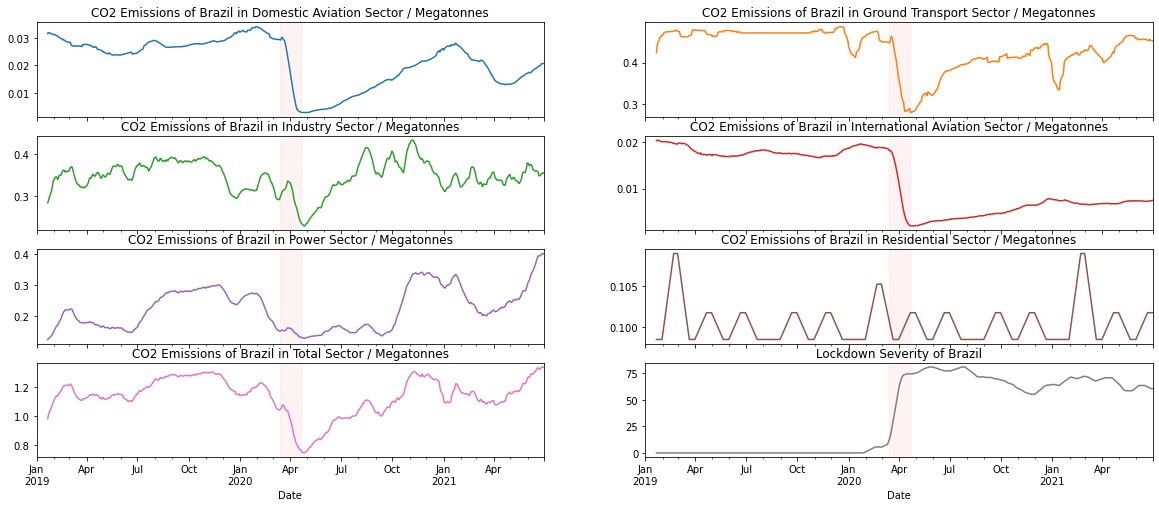

<Figure size 432x288 with 0 Axes>

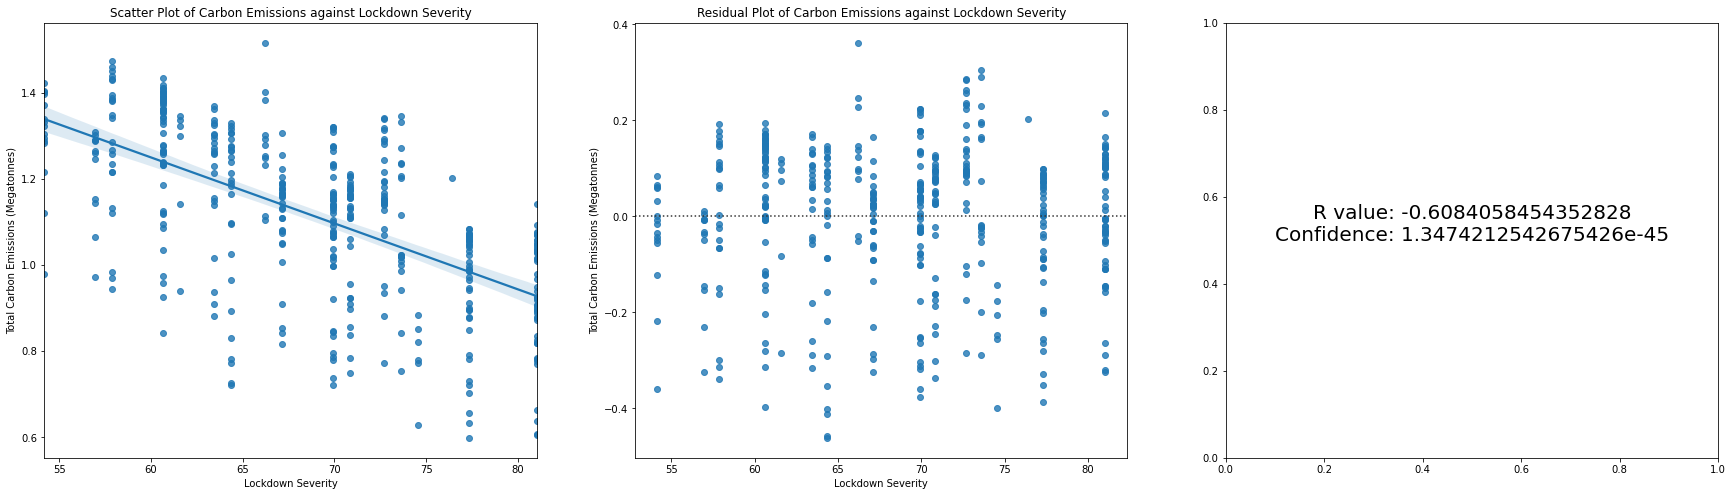

In [12]:
# Brazil

emissionsAnalysis(
    country = "Brazil", 
    initial_start = "2020-3-13",
    initial_end = "2020-4-20",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***China EDA***

(0.07418250457411302, 0.10202560612361711)

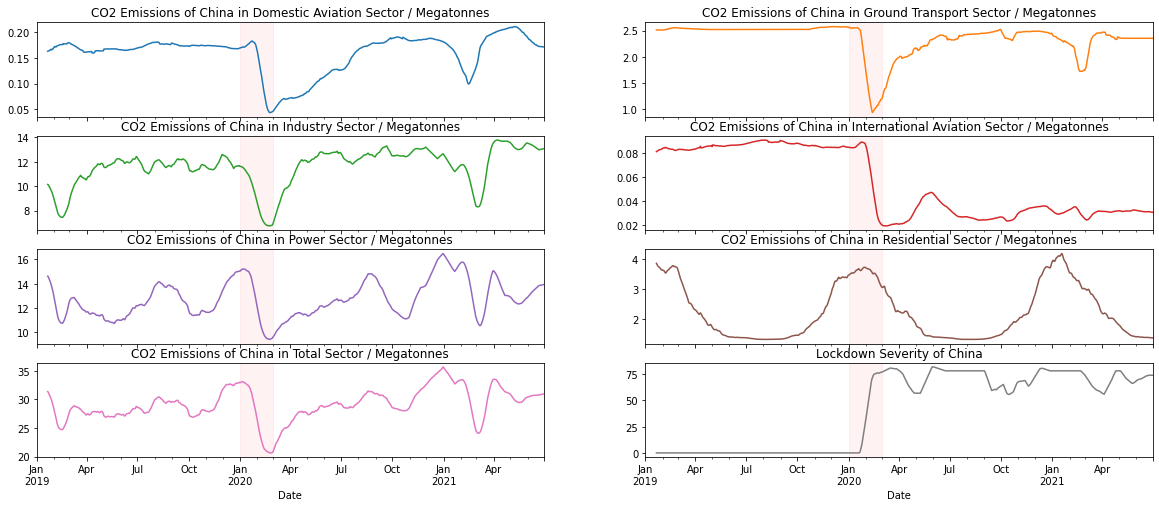

<Figure size 432x288 with 0 Axes>

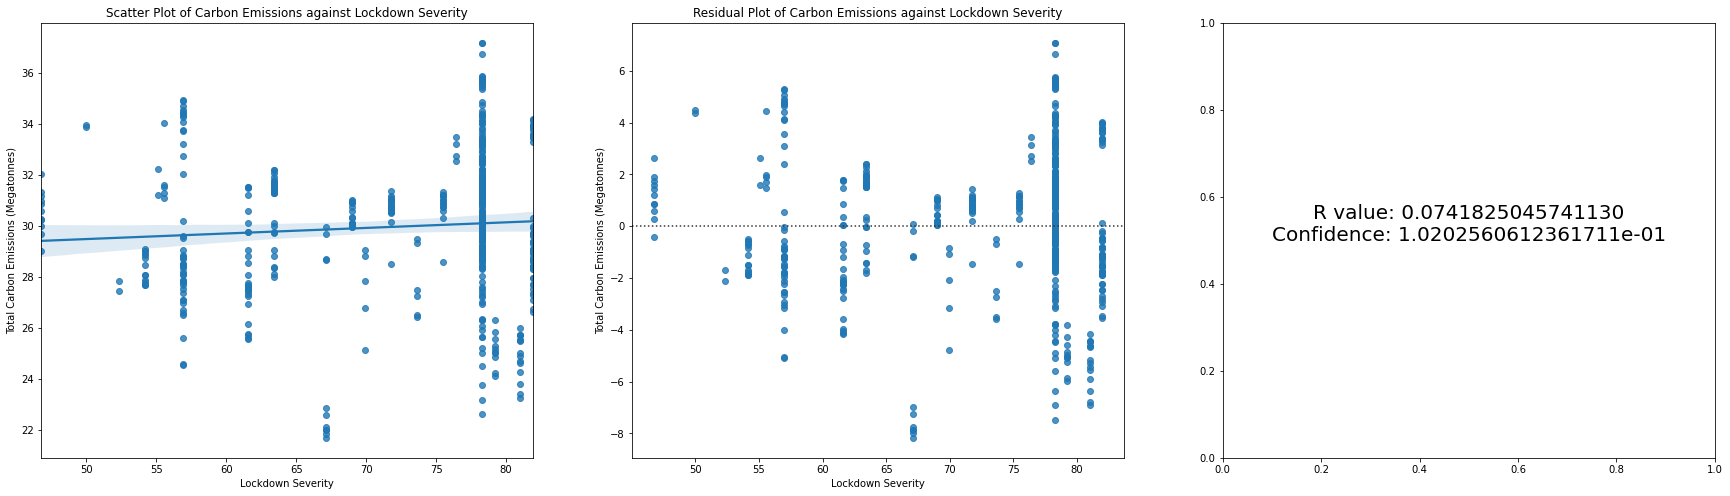

In [13]:
# China

emissionsAnalysis(
    country = "China", 
    initial_start = "2020-1-1",
    initial_end = "2020-3-1",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***France EDA***

(0.08571658137399299, 0.07580679458799854)

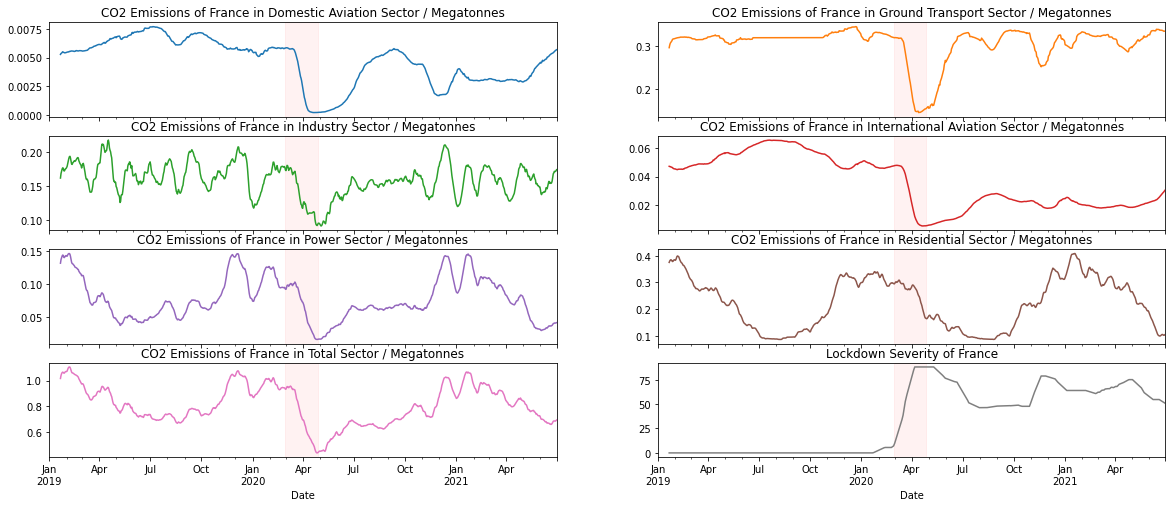

<Figure size 432x288 with 0 Axes>

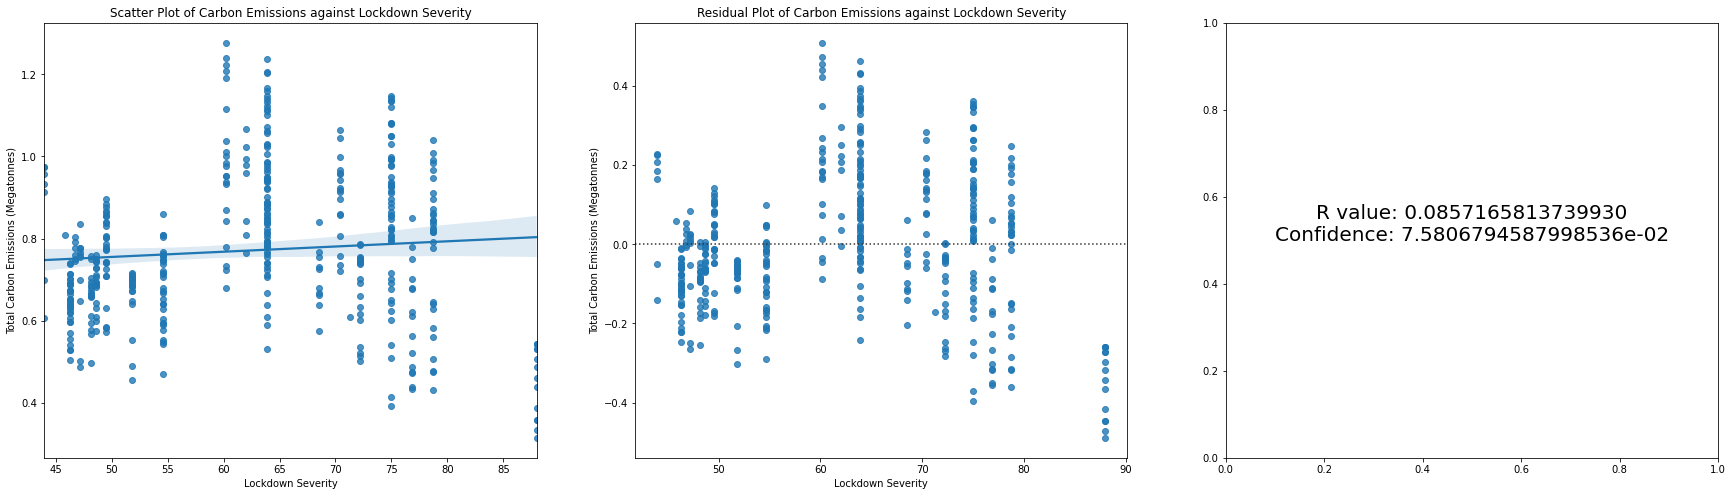

In [14]:
# France

emissionsAnalysis(
    country = "France", 
    initial_start = "2020-2-28",
    initial_end = "2020-4-27",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***Germany EDA***

(0.34785270865346596, 2.6564762523814035e-14)

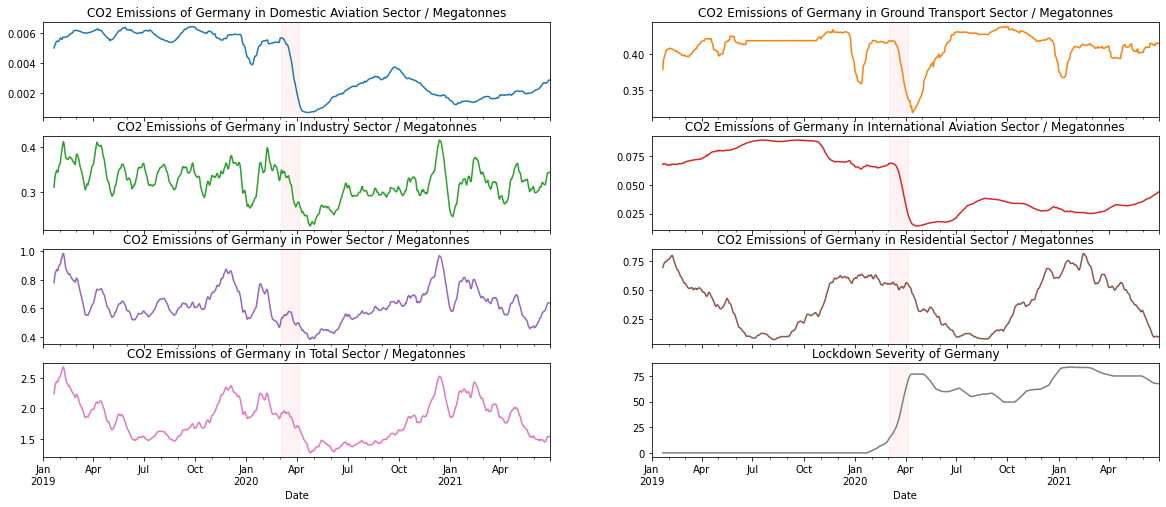

<Figure size 432x288 with 0 Axes>

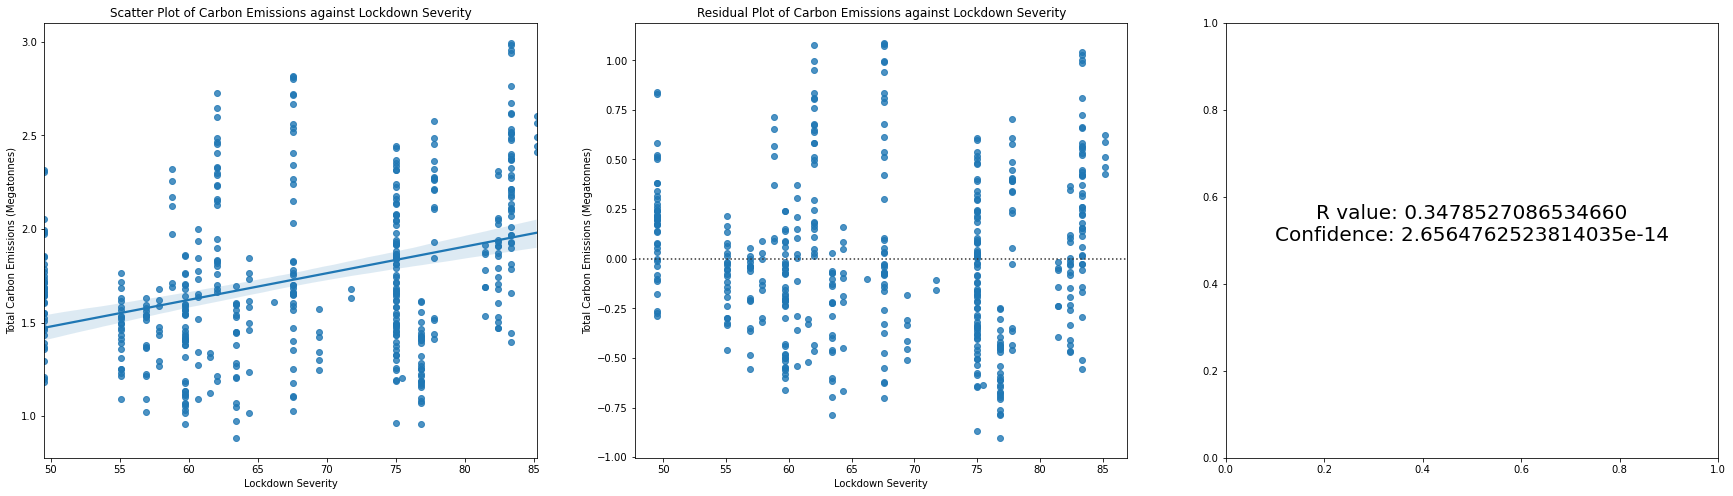

In [15]:
# Germany

emissionsAnalysis(
    country = "Germany", 
    initial_start = "2020-3-3",
    initial_end = "2020-4-5",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***India EDA***

(-0.762339585012385, 1.0755278568592471e-86)

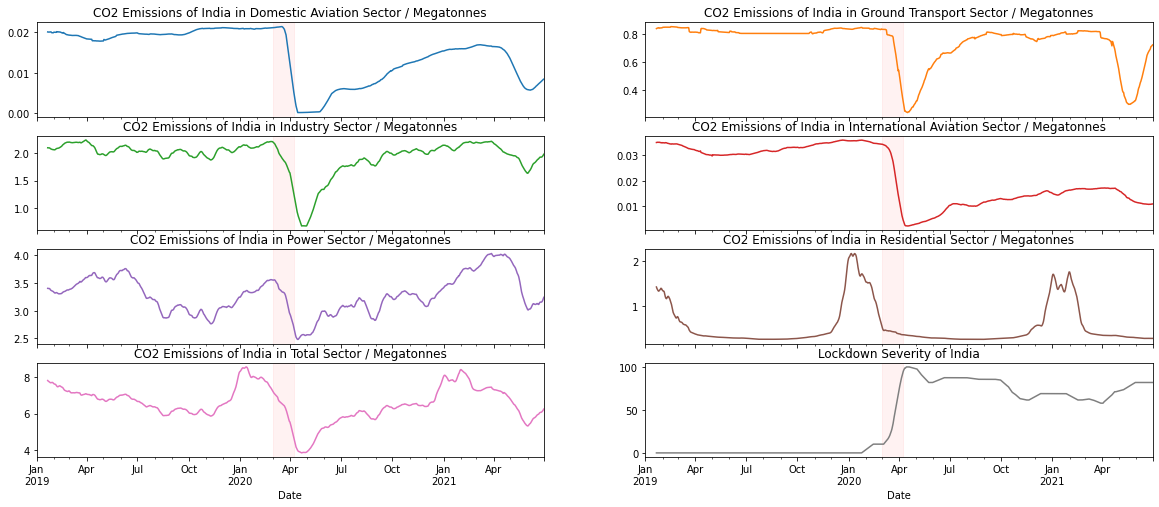

<Figure size 432x288 with 0 Axes>

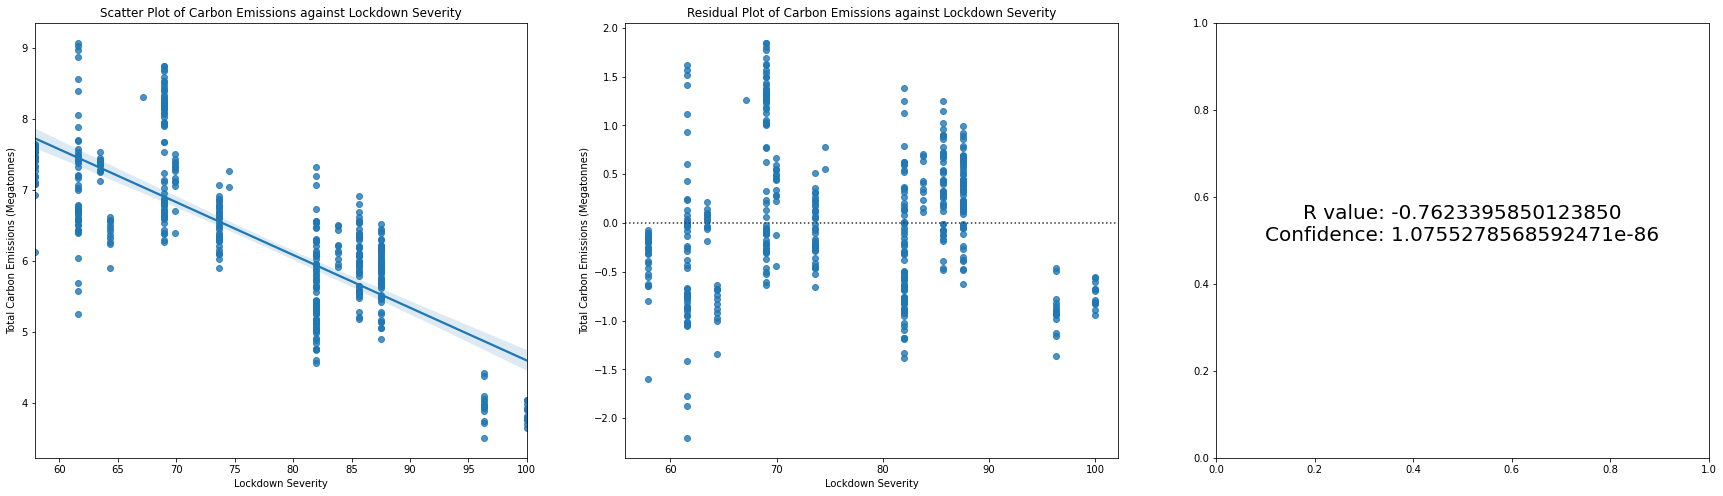

In [16]:
# India

emissionsAnalysis(
    country = "India", 
    initial_start = "2020-3-1",
    initial_end = "2020-4-7",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

Interestingly, this is the only country that showed such a strong negative correlation, most of the others have |R| value of about 0 with the exception of Brazil that got about .6, which is not that strong.

### ***Italy EDA***

(0.3991263780509712, 9.272261596206605e-18)

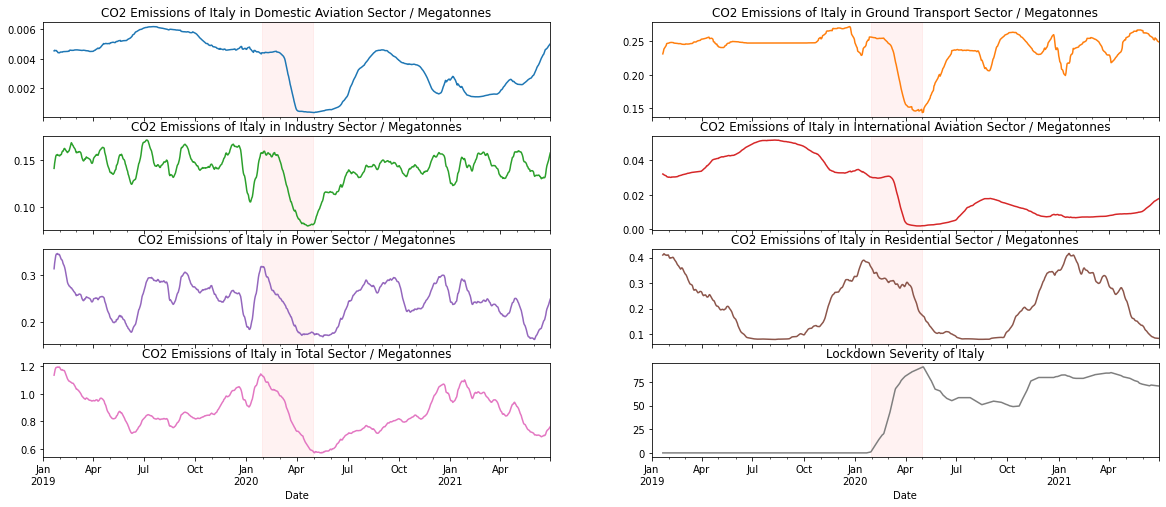

<Figure size 432x288 with 0 Axes>

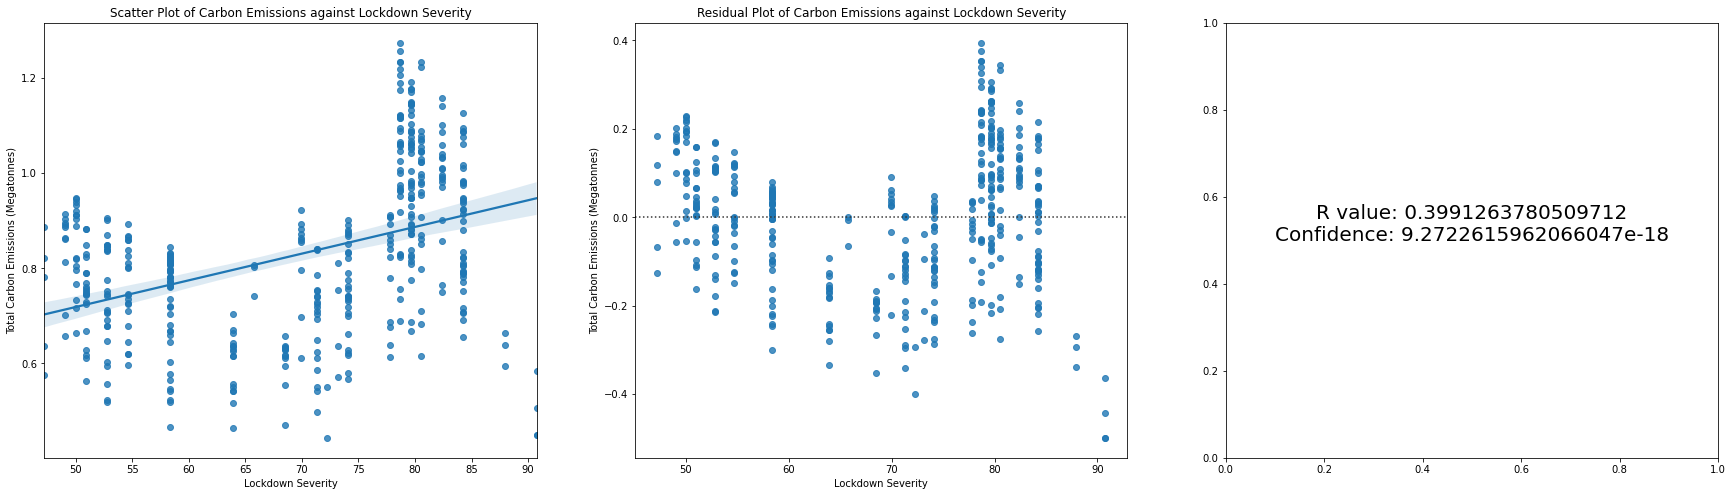

In [17]:
# Italy

emissionsAnalysis(
    country = "Italy", 
    initial_start = "2020-1-30",
    initial_end = "2020-4-30",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***Japan EDA***

(0.3260834982399544, 1.1608660183256809e-11)

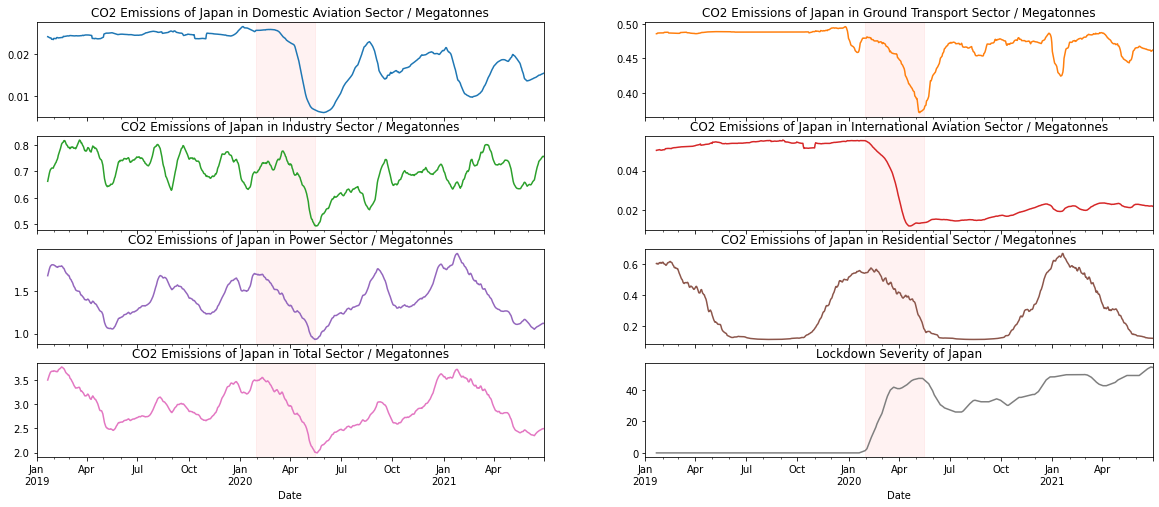

<Figure size 432x288 with 0 Axes>

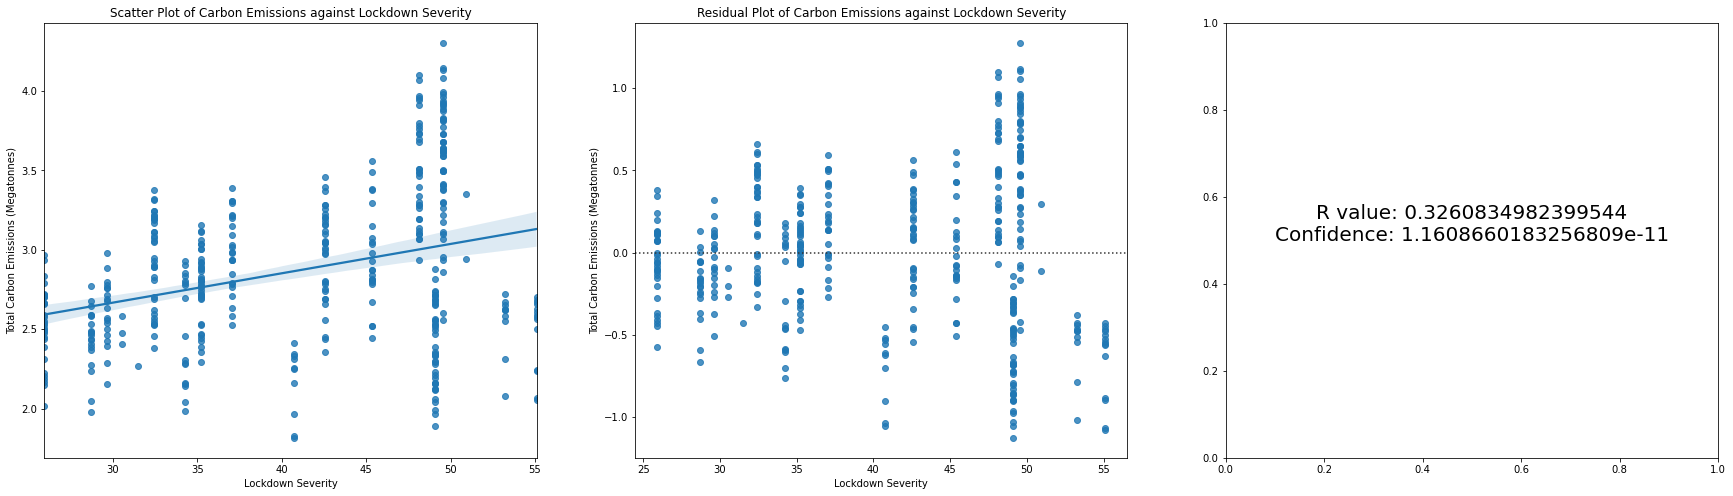

In [18]:
# Japan

emissionsAnalysis(
    country = "Japan", 
    initial_start = "2020-1-30",
    initial_end = "2020-5-15",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***Russia EDA***

(-0.3923834546247431, 1.1851441773670308e-16)

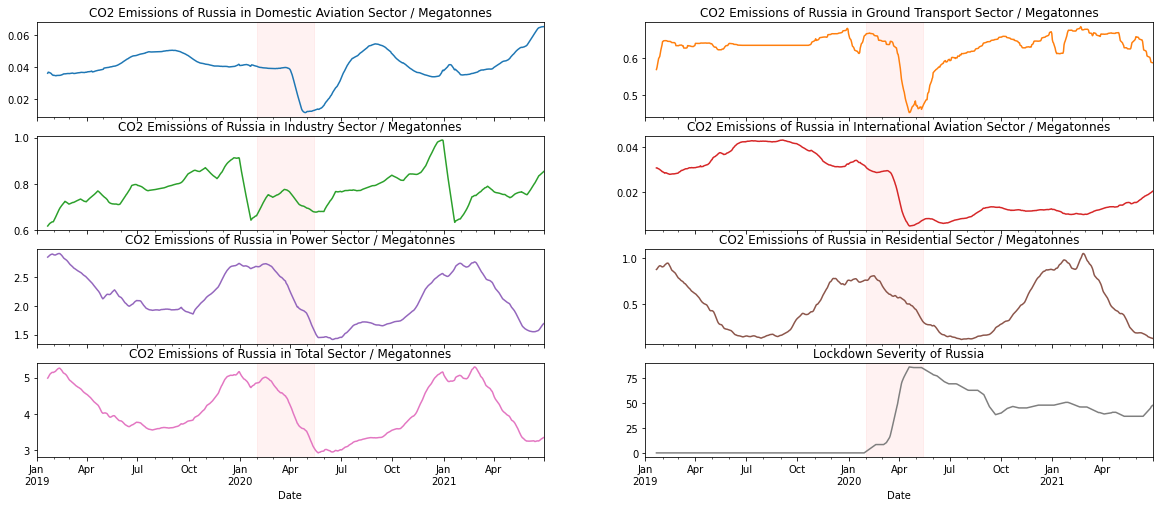

<Figure size 432x288 with 0 Axes>

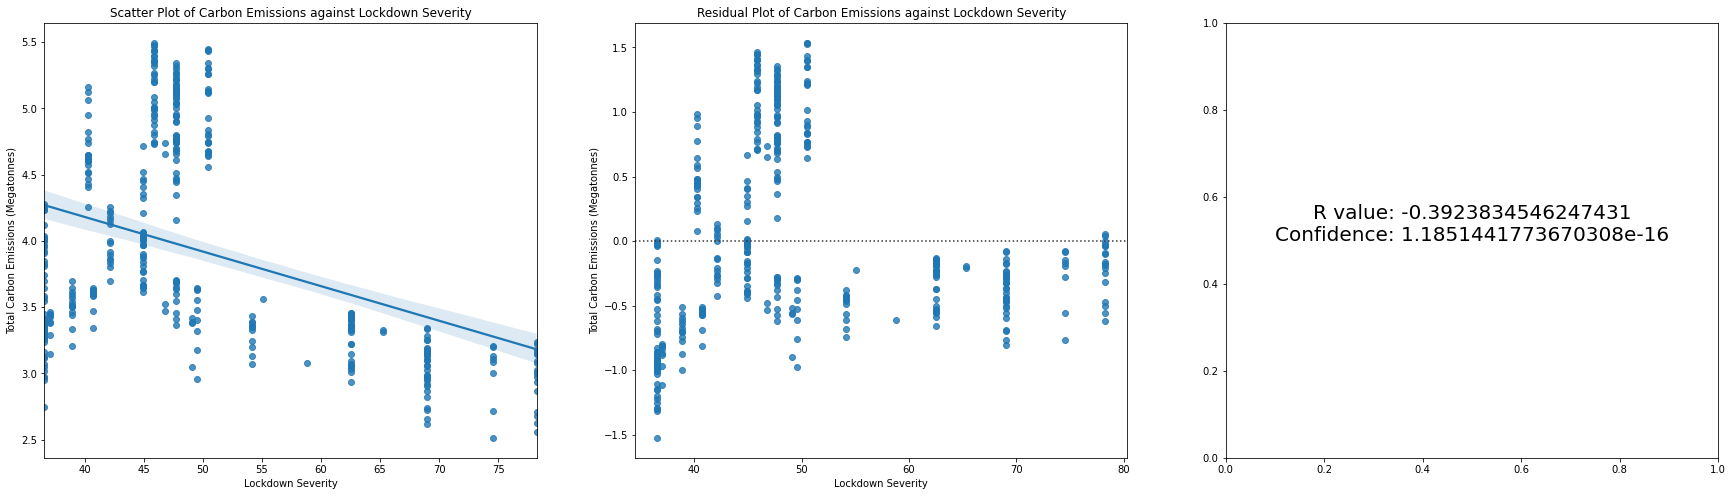

In [19]:
# Russia

emissionsAnalysis(
    country = "Russia", 
    initial_start = "2020-2-1",
    initial_end = "2020-5-14",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***Spain EDA***

(-0.23110046135647005, 9.299902412944723e-07)

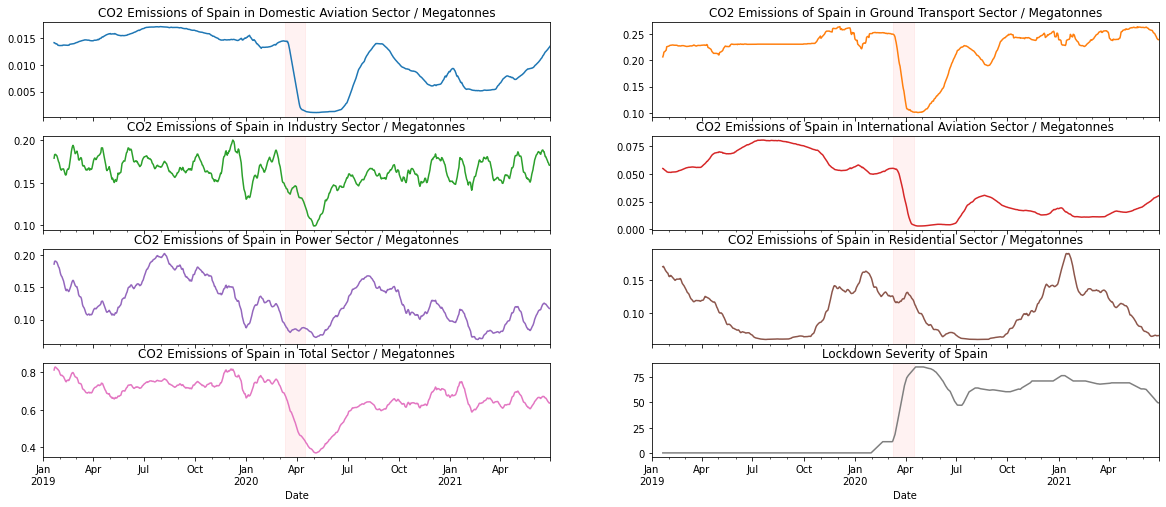

<Figure size 432x288 with 0 Axes>

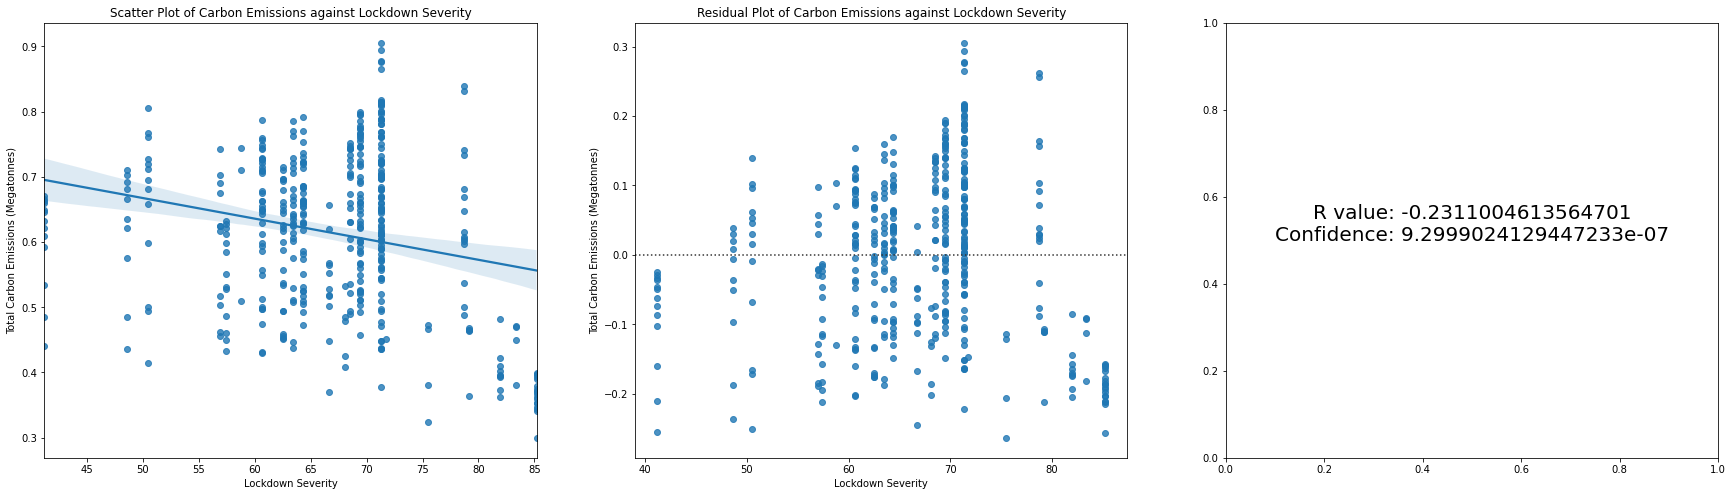

In [20]:
# Spain

emissionsAnalysis(
    country = "Spain", 
    initial_start = "2020-3-10",
    initial_end = "2020-4-16",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***United Kingdom EDA***

(0.21117613843497257, 8.298854970269245e-06)

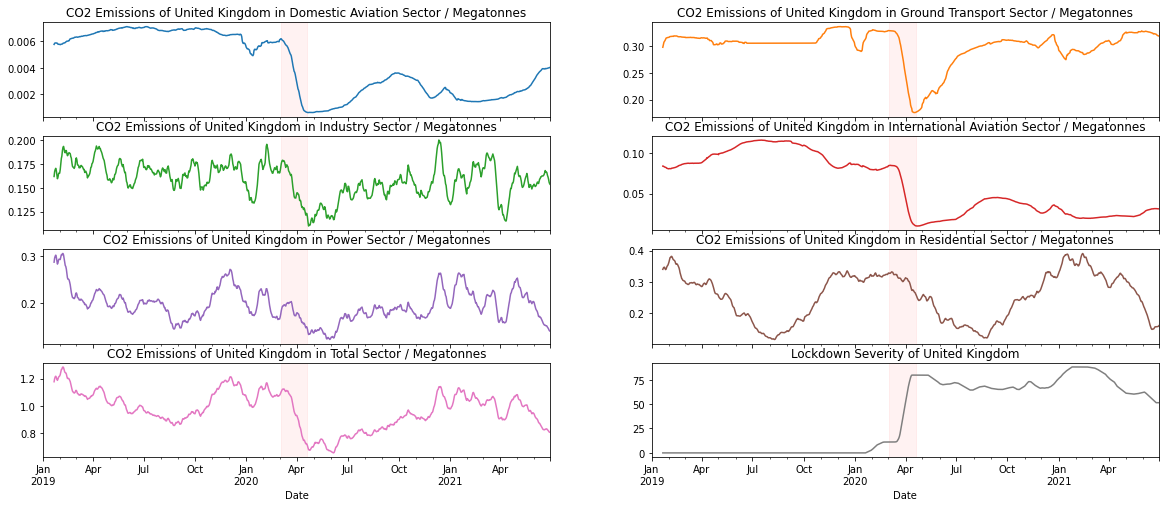

<Figure size 432x288 with 0 Axes>

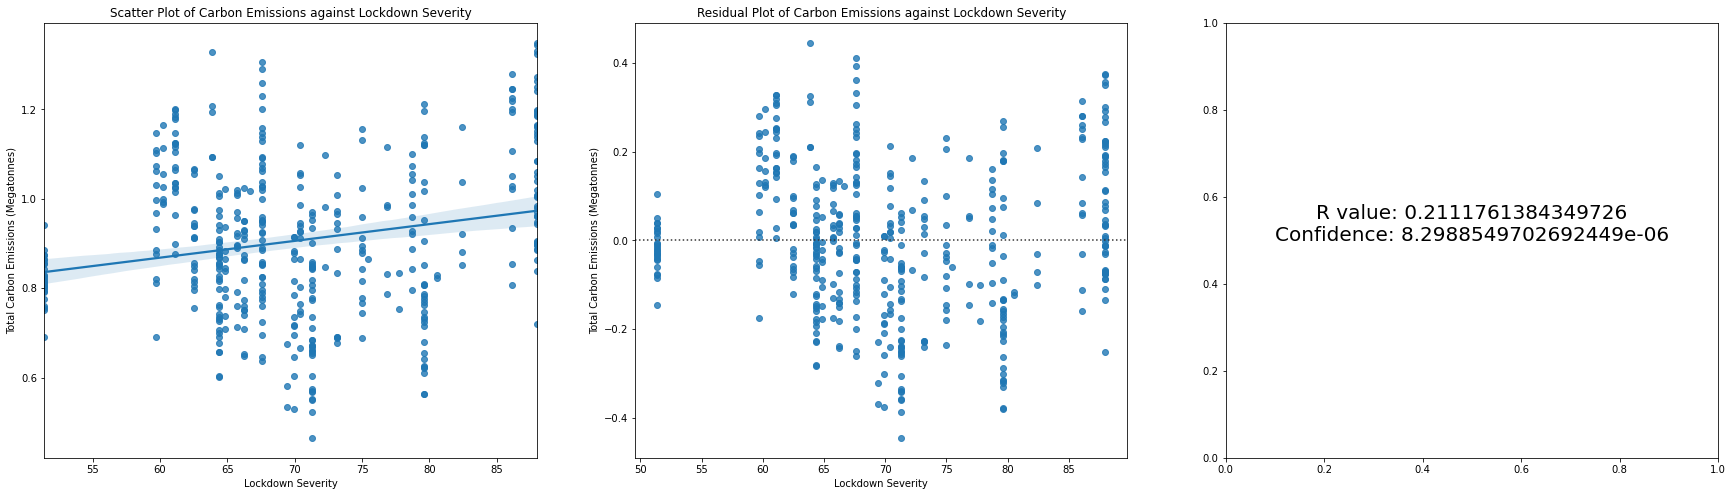

In [21]:
# United Kingdom

emissionsAnalysis(
    country = "United Kingdom", 
    initial_start = "2020-3-3",
    initial_end = "2020-4-19",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

### ***United States EDA***

(-0.016181163803617327, 0.7350048148236316)

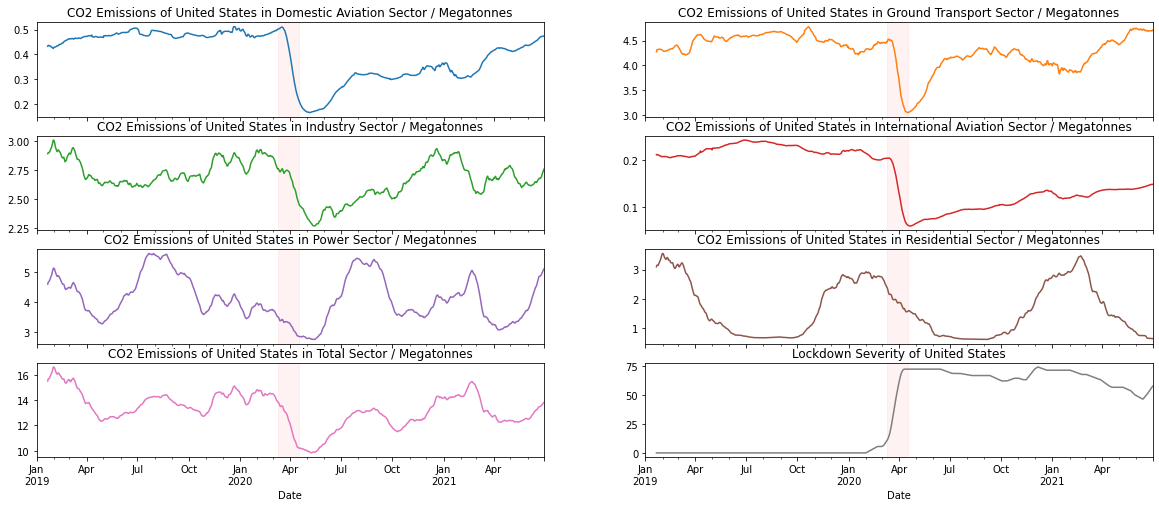

<Figure size 432x288 with 0 Axes>

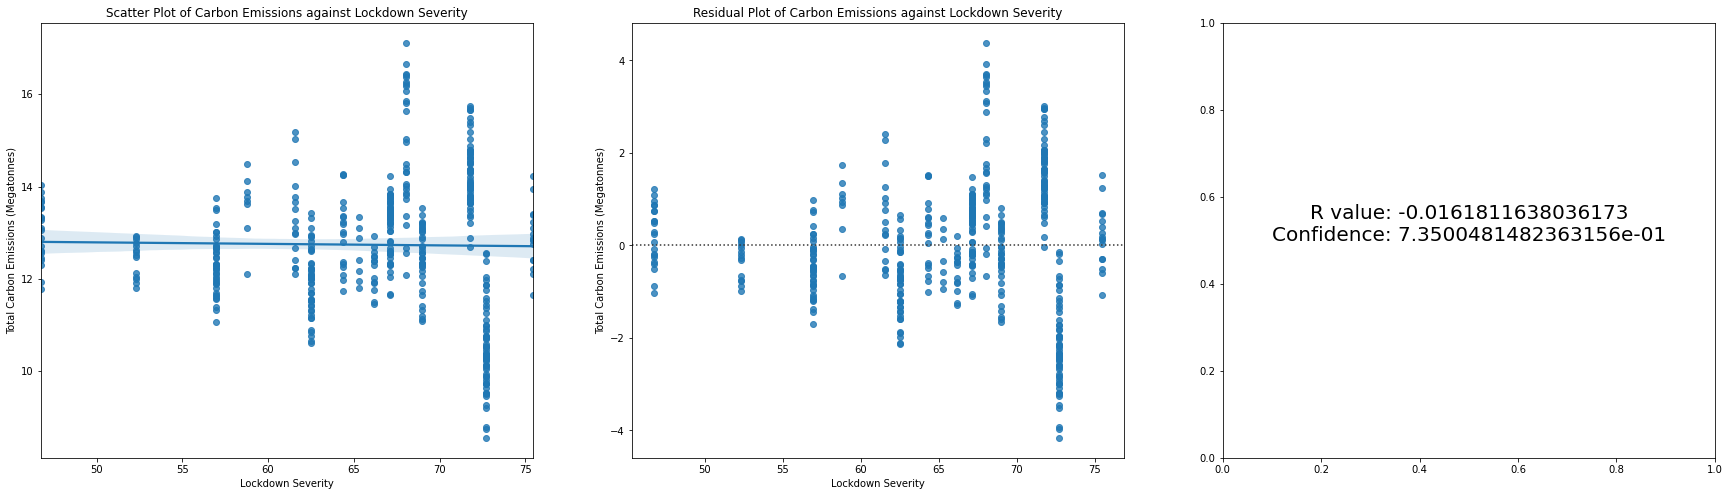

In [22]:
# United States

emissionsAnalysis(
    country = "United States", 
    initial_start = "2020-3-10",
    initial_end = "2020-4-17",
    window_size = 21, 
    figsize = (20, 8),
    legend = None
)

<a id="Q2"></a>
## **Are lockdowns increasing deforestation?**

For some consistency, I will be using the following 11 countries just like the preivous question
- Brazil
- China
- France
- Germany
- India
- Italy
- Japan
- Russia
- Spain
- United Kingdom
- United States
  
I plotted the lockdown severity, forest area and forest area change against time for each of these 11 countries.\
The reason for this is to see if the correlation is between forest area or forest area change.

Alongside these 11 countries, I also plotted these graphs on a world wide scale as all countries showed none or small change

In [23]:
def forestAnalysis(
    country = "World",
    start_year = "2010",
    end_year = "2021",
    layout = (3, 1),
    **kwargs
):
    df = pd.merge(
        df_forest[df_forest.Country == country].set_index("Date"),
        df_Lockdown_Severity.groupby("Date")["Lockdown Severity"].median() if country == "World" 
        else df_Lockdown_Severity[df_Lockdown_Severity.Country == country].set_index("Date"),
        on = "Date",
        how = 'outer'
    )

    # Fill the pre-covid period
    df["Lockdown Severity"].fillna(0, inplace = True)

    # Calculate the diff    
    df["Diff"] = df["Forest Area"].diff(periods = 1)

    # Interpolating the Forest Area and its difference
    df["Forest Area"] = df["Forest Area"].sort_index().interpolate(method='linear', axis=0)
    df.Diff = df.Diff.sort_index().interpolate(method='linear', axis=0)

    # Restricting the Period
    start_year = pd.to_datetime(start_year)
    end_year = pd.to_datetime(end_year)
    df = df[(df.index >= start_year) & (df.index <= end_year)]
    
    # Plotting the graph
    ax = df[["Lockdown Severity", "Forest Area", "Diff"]].plot(
        kind = 'line', 
        subplots = True,
        layout = layout,
        sharex = True,
        **kwargs
    ).flatten()

    # Color the negative regions    
    ax[2].fill_between(
            df.index,
            df.Diff,
            0,
            where = df.Diff < 0,
            color = 'red',
            alpha = 0.4,
            interpolate = True
        )

    # Color the positive regions   
    ax[2].fill_between(
            df.index,
            df.Diff,
            0,
            where = df.Diff > 0,
            color = 'green',
            alpha = 0.4,
            interpolate = True
        ) 

    # Outline the middle
    ax[2].axhline(y = 0, color = "orange")

    # Graph Titles
    ax[0].set_title(f"Lockdown Severity against Time for {country}")
    ax[1].set_title(f"Forest Area against Time for {country}")
    ax[2].set_title(f"Forest Area Change against Time for {country}")
    
    return ax

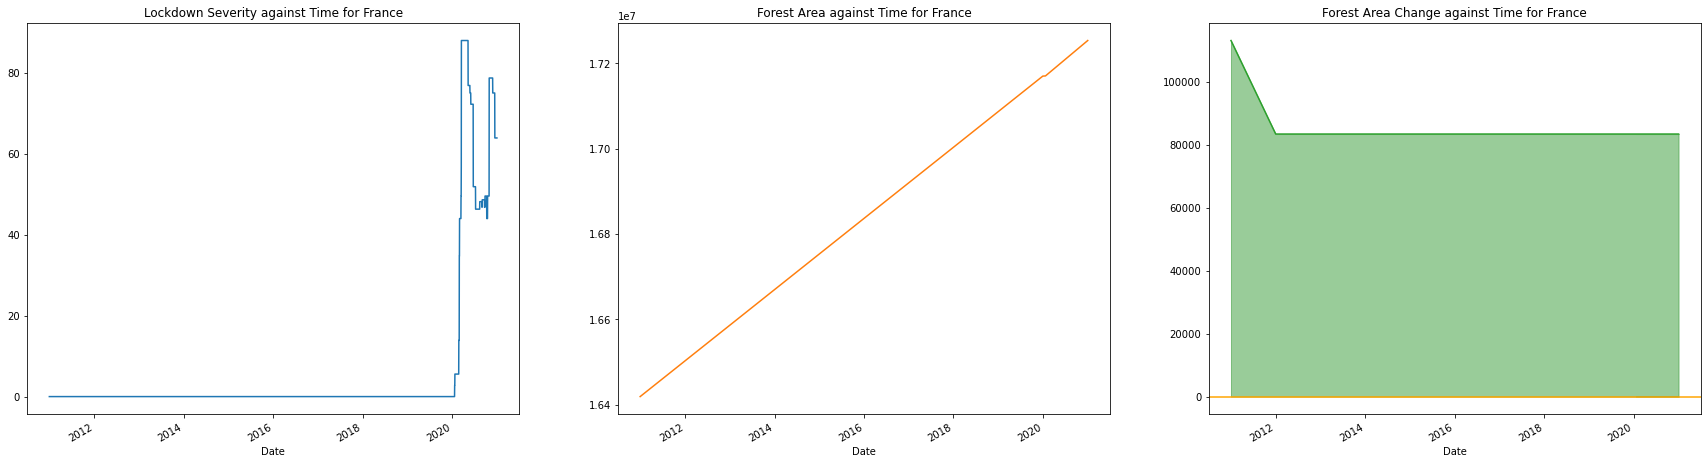

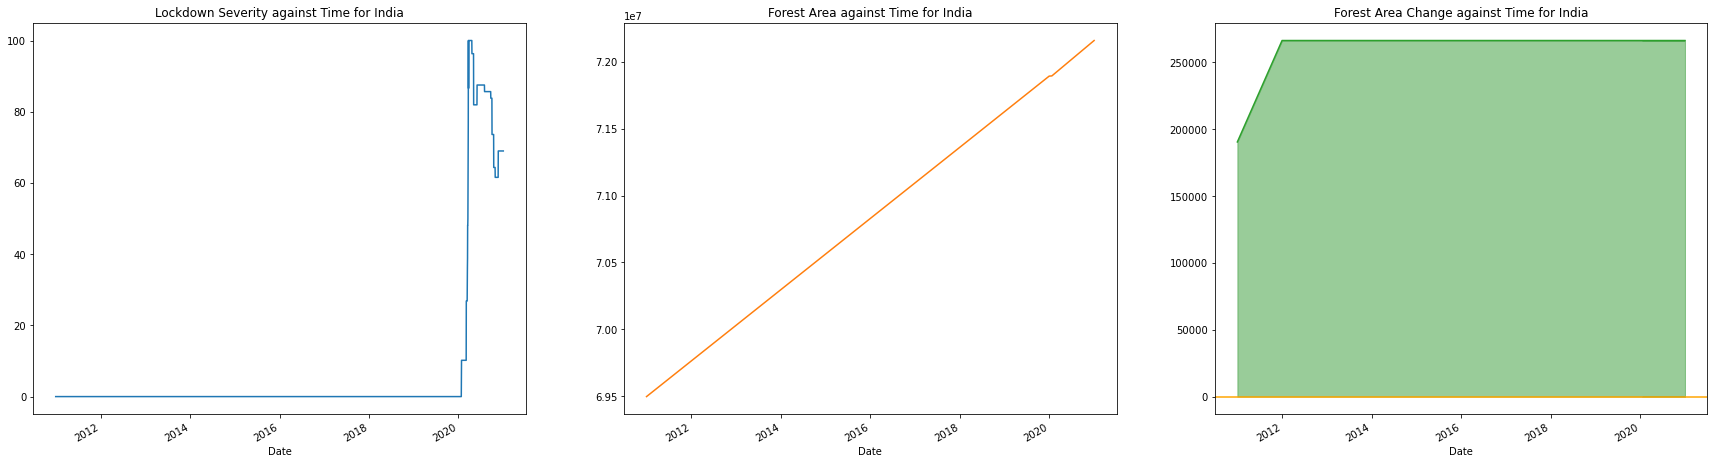

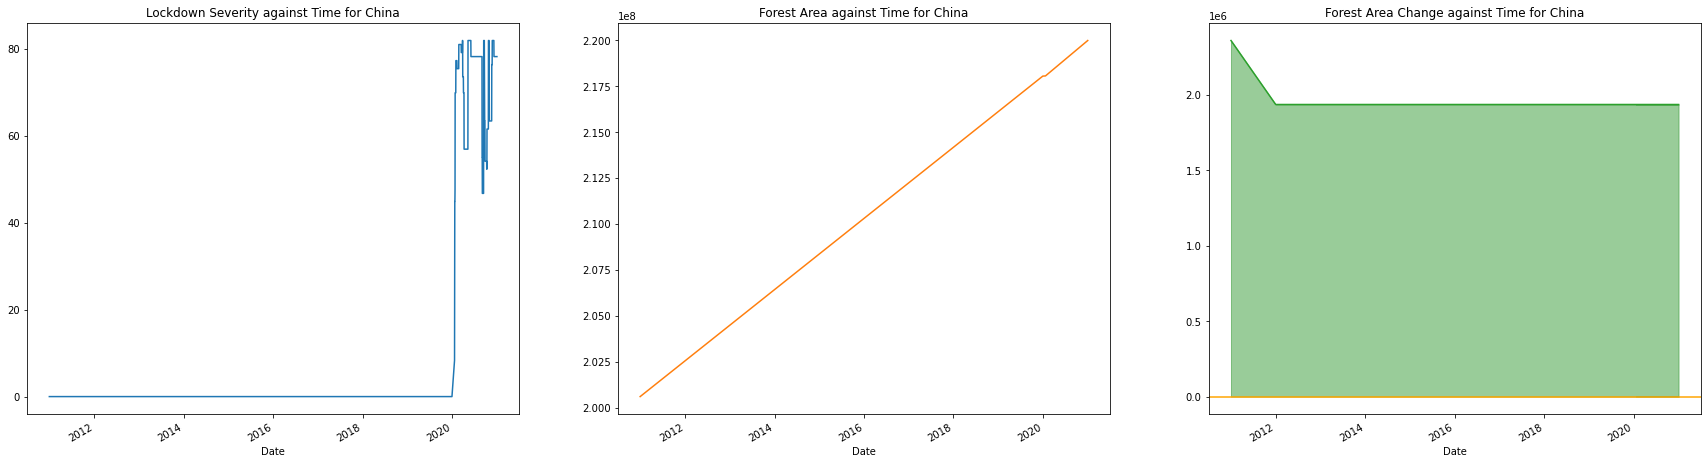

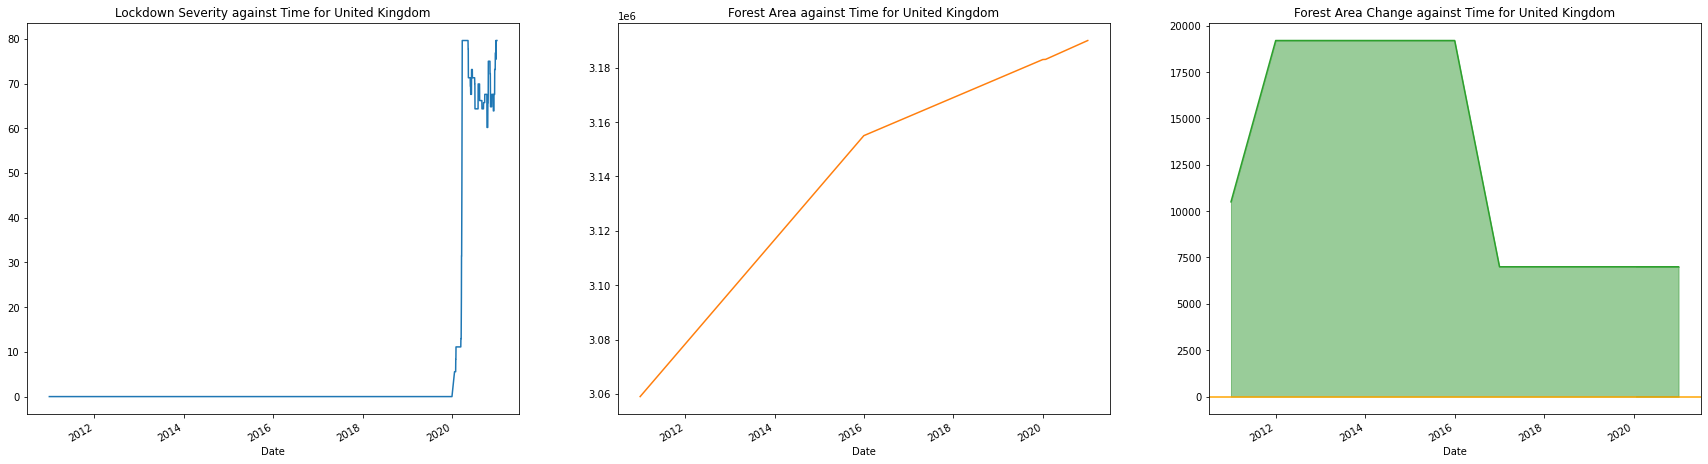

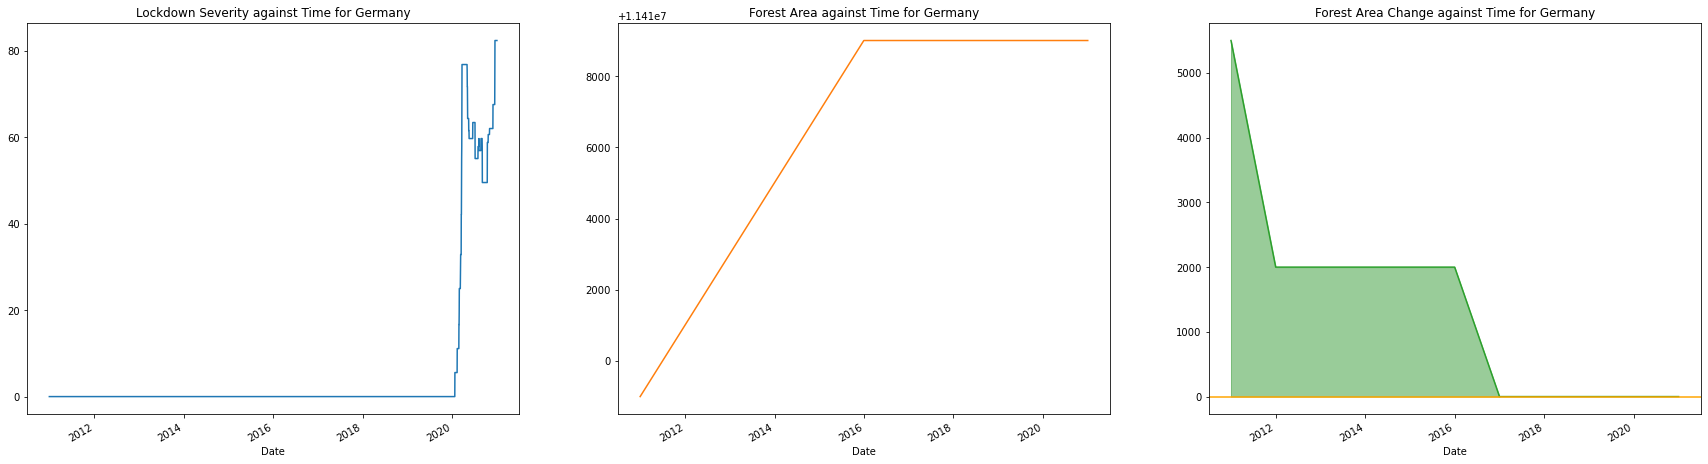

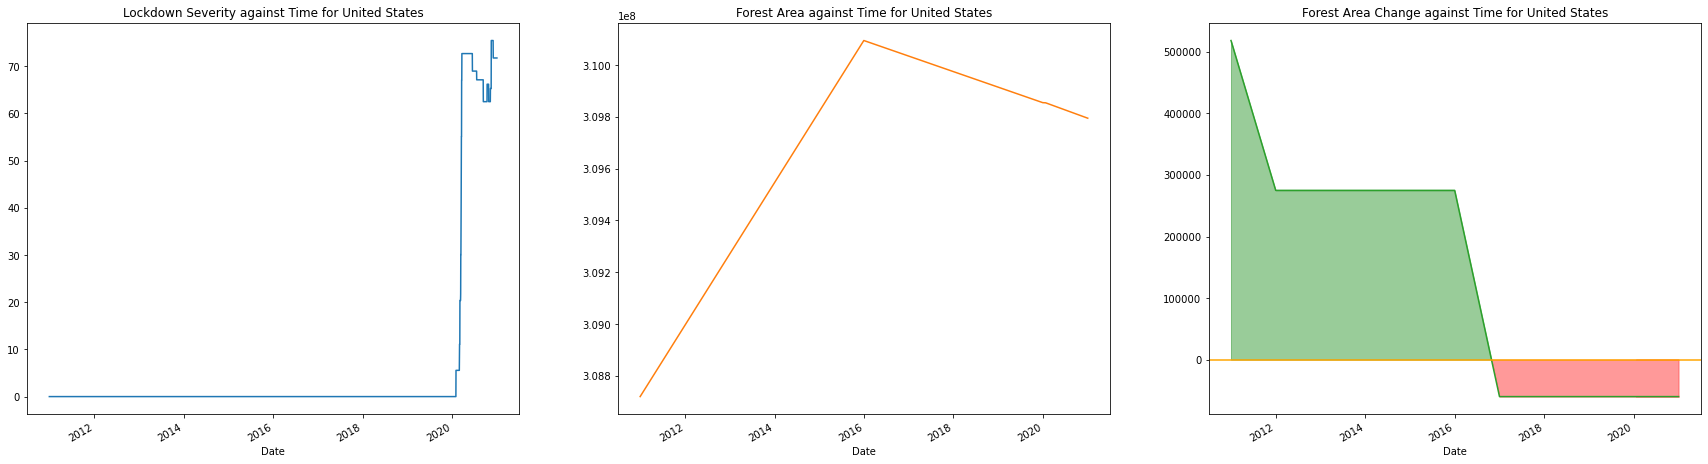

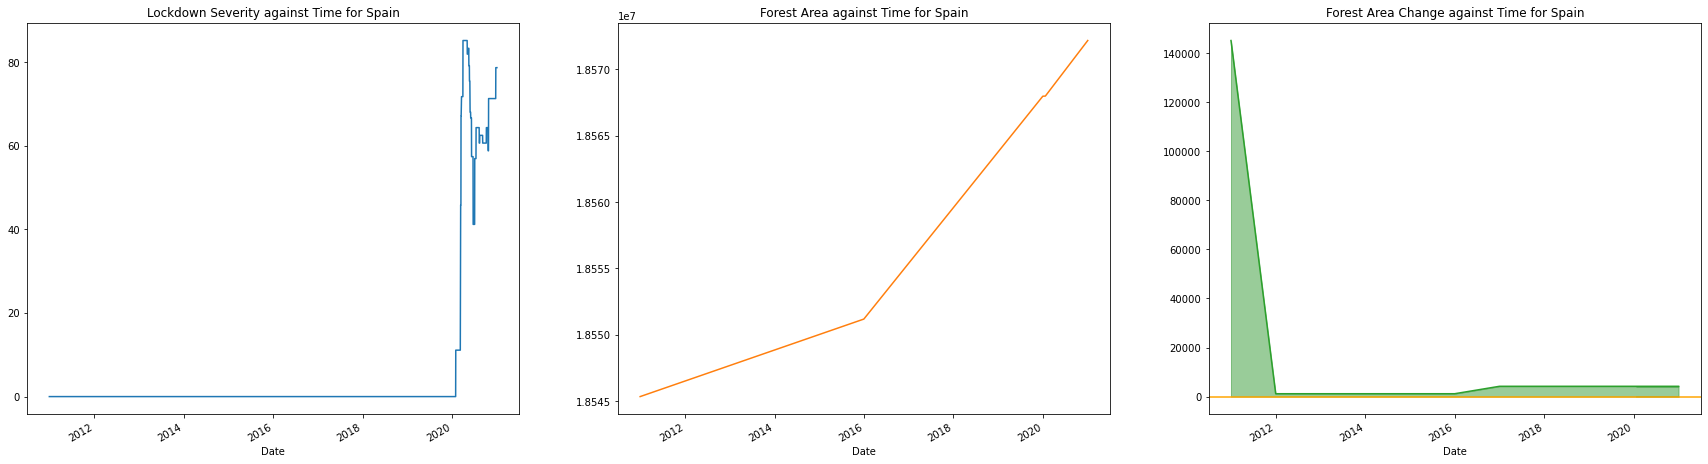

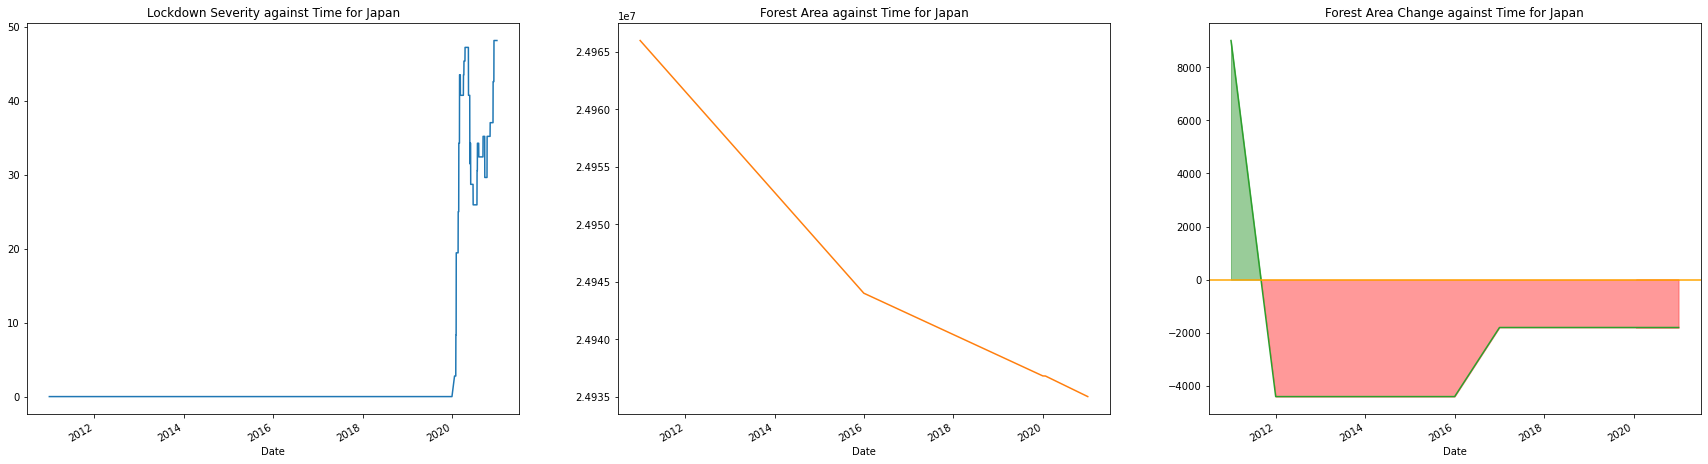

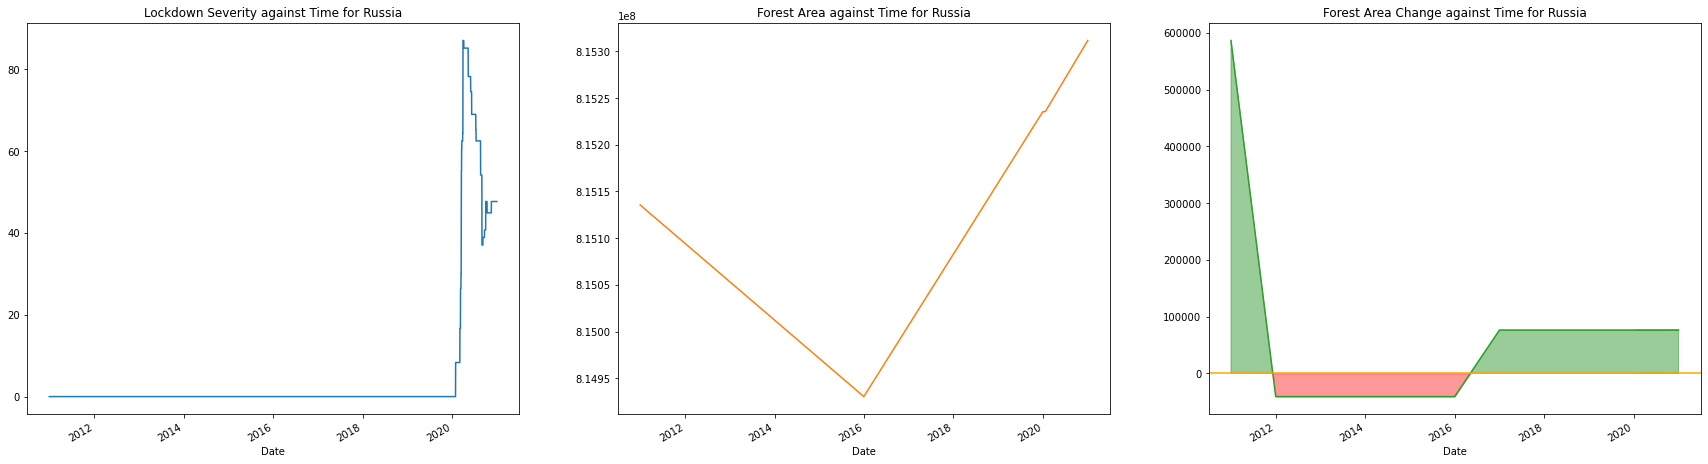

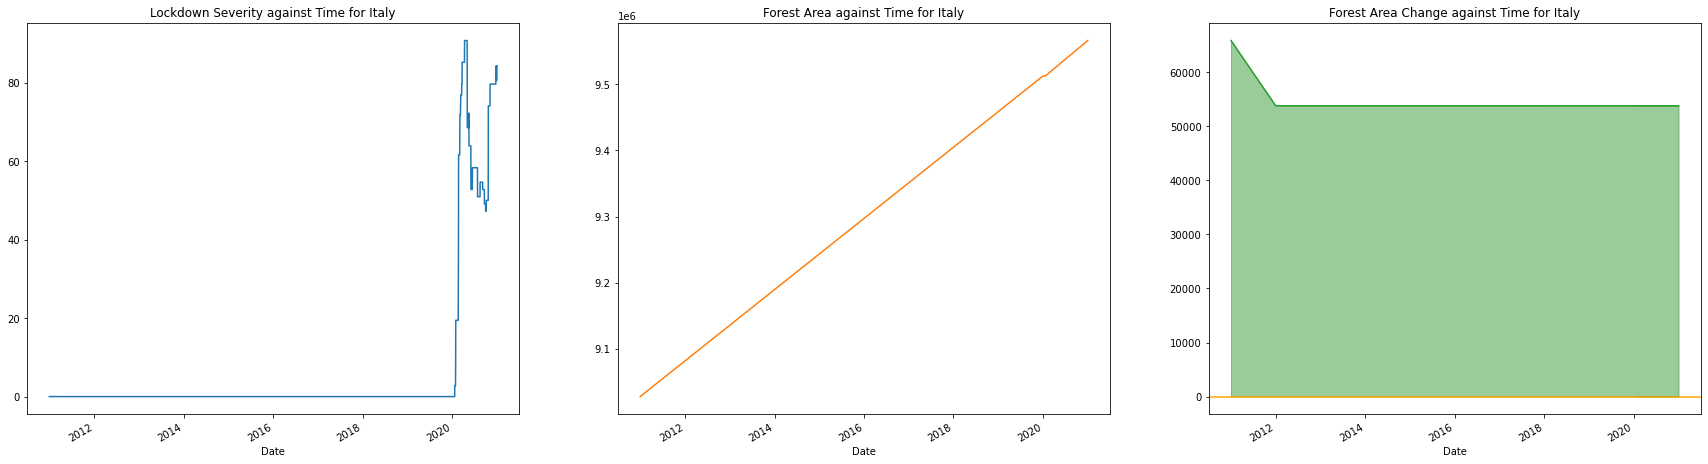

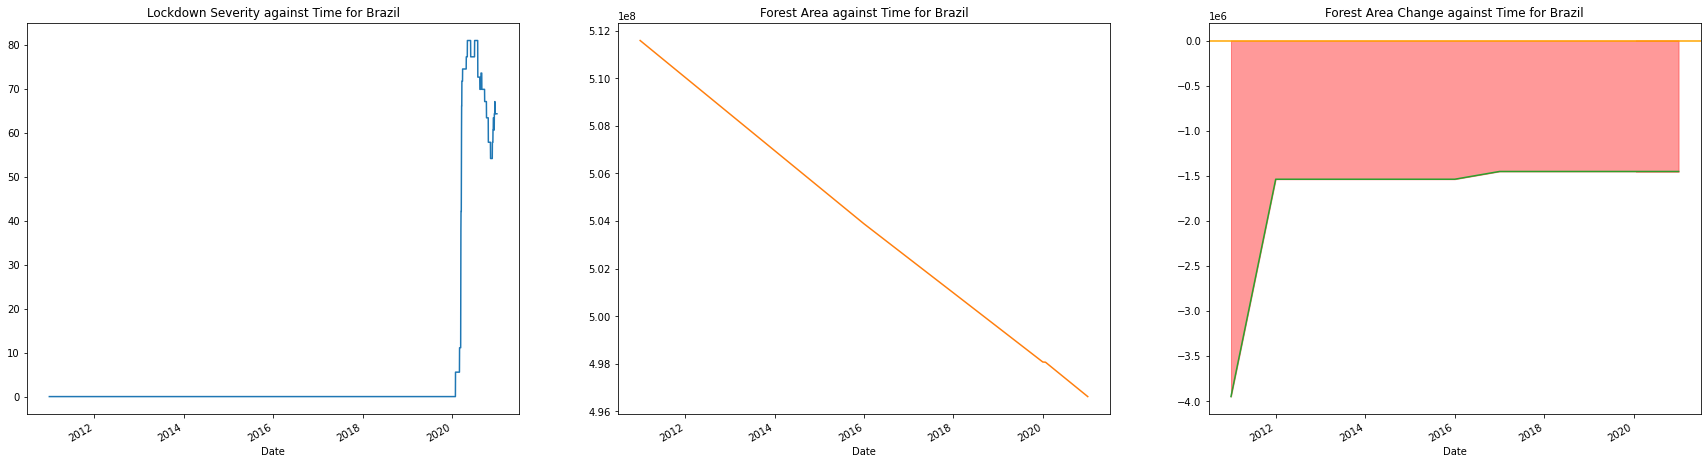

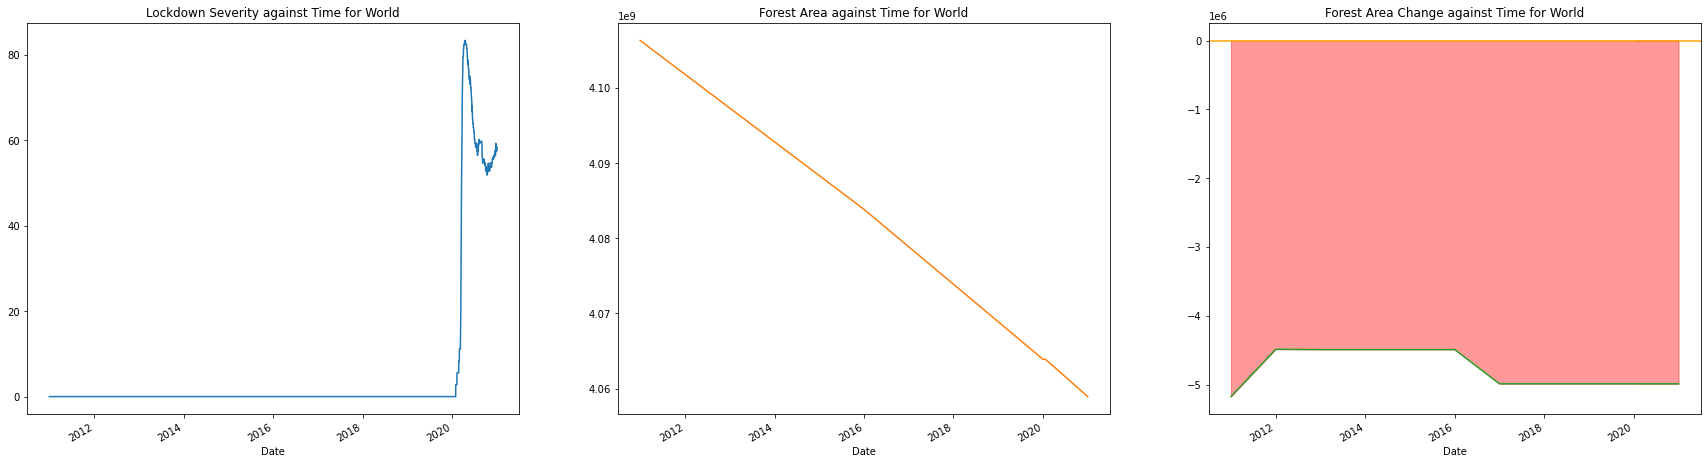

In [24]:
for country in [ 'France', 'India', 'China', 'United Kingdom', 'Germany','United States', 'Spain', 'Japan', 'Russia', 'Italy', 'Brazil', "World"]:
    forestAnalysis(
        country = country,
        figsize = (30, 8),
        legend = None,
    )

<a id="Q3"></a>
## **Does lockdowns increase global temperatures?**

It is predicted that the global temperatures will experience a sudden change, negative or positive, in the period Jan 2020 - April 2020. \
That is when COVID started to become a pandemic, causing many countries to lockdown. \
Thus, this section will attempt to see if there will be a sudden change.

Firstly, I plotted the graph of average global temperature and its change against time. \
I also plotted the graph of lockdown severity against time as a comparison.

In [25]:
def tempAnalysis(
    start_date = "1990-01-01",
    end_date = "2020-12-31",
    window_size = 1,
    diff_size = 1,
    country = None,
    layout = (3, 1)
    **kwargs
):
    if country == None : # For world data, within the specified period
        country = "The World"
        df = pd.merge(
            df_temp.groupby("Date").mean().rolling(window_size).mean(),
            df_Lockdown_Severity.groupby("Date").median(),
            on = "Date",
            how = 'outer'
        )

    else : # For country specific data, within the specified period
        df = pd.merge(
            df_temp[df_temp.Country == country].set_index("Date").rolling(window_size).mean(),
            df_Lockdown_Severity[df_Lockdown_Severity.Country == country].set_index("Date"),
            on = "Date",
            how = 'outer'
        )


    # Calculate the diff    
    df["Diff"] = df.Temp.diff(periods = diff_size)

    # Interpolating the temperature and its difference
    df.Temp = df.Temp.sort_index().interpolate(method='linear', axis=0)
    df.Diff = df.Diff.sort_index().interpolate(method='linear', axis=0)

    # COVID did not exist yet so 0
    df["Lockdown Severity"].fillna(0, inplace = True)

    # Restrict the Period
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    df = df[(df.index <= end_date) & (df.index >= start_date)].sort_index()
    
    # Plotting the graph
    ax = df[["Lockdown Severity", "Temp", "Diff"]].plot(
        kind = 'line', 
        subplots = True,
        layout = layout,
        sharex = True,
        **kwargs
    ).flatten()

    # Color the negative regions    
    ax[2].fill_between(
            df.index,
            df.Diff,
            0,
            where = df.Diff < 0,
            color = 'red',
            alpha = 0.4,
            interpolate = True
        )

    # Color the positive regions   
    ax[2].fill_between(
            df.index,
            df.Diff,
            0,
            where = df.Diff > 0,
            color = 'green',
            alpha = 0.4,
            interpolate = True
        ) 

    # Outline the middle
    ax[2].axhline(y = 0, color = "orange")

    # Graph Titles
    ax[0].set_title(f"Lockdown Severity against Time for {country}")
    ax[1].set_title(f"Temperature against Time for {country}")
    ax[2].set_title(f"Temperature Change against Time for {country}")
    
    return ax

array([<AxesSubplot:title={'center':'Lockdown Severity against Time for The World'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'Temperature against Time for The World'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'Temperature Change against Time for The World'}, xlabel='Date'>],
      dtype=object)

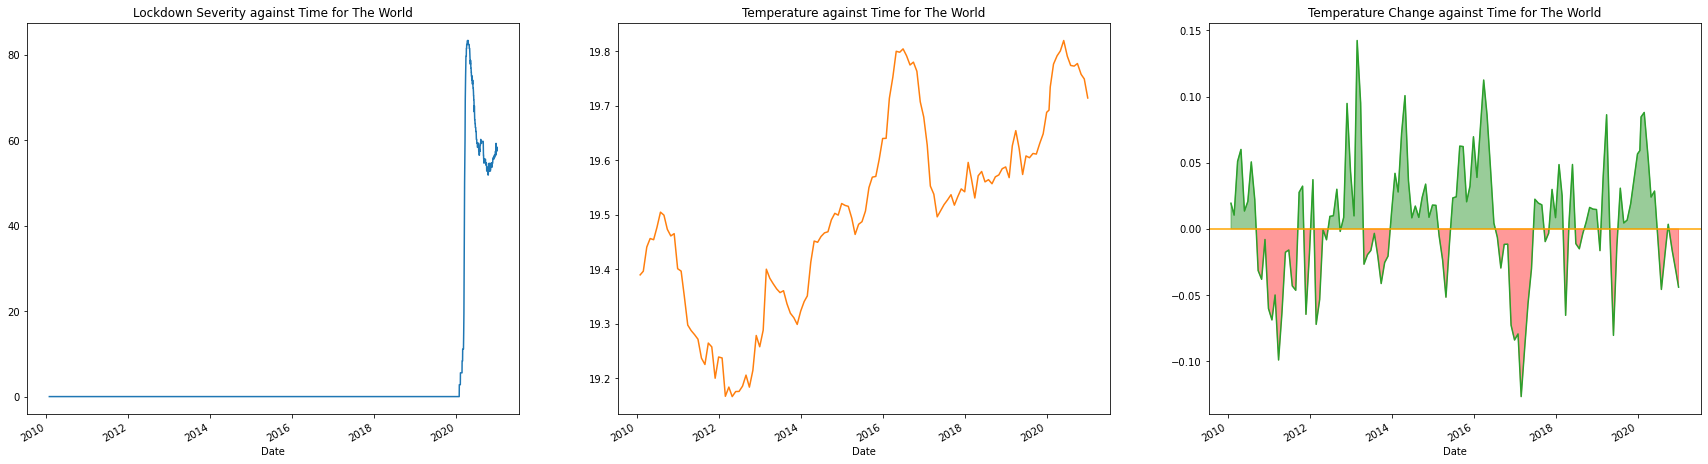

In [26]:
tempAnalysis(
    start_date = "2010",
    diff_size = 2,
    window_size = 12,
    figsize = (30, 8),
    legend = None
)

There is not really any obvious correlation here. The temperature keeps changing randomly, like a residual graph. 
While there is a spike temperatre in 2020, it is not the only one. There are also similar spikes which happened in Feb 2010, March 2012, Dec 2013, May 2015.
As such, I decided to plot for each of the 11 countries as stated above to attempt to single out patterns

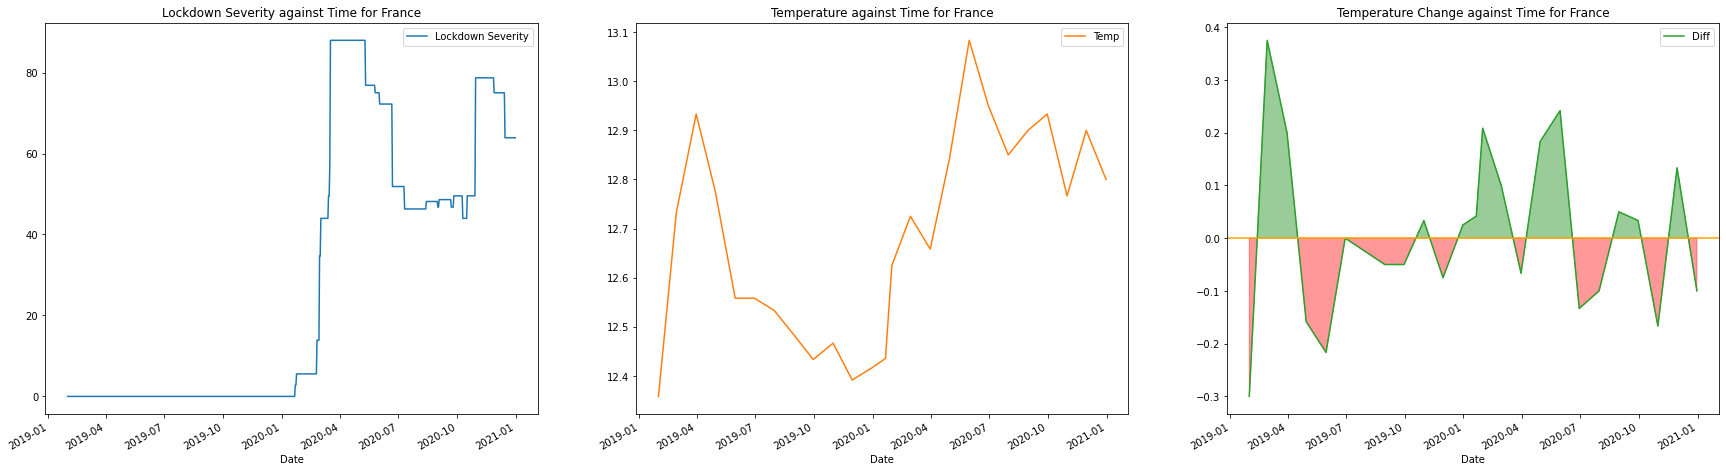

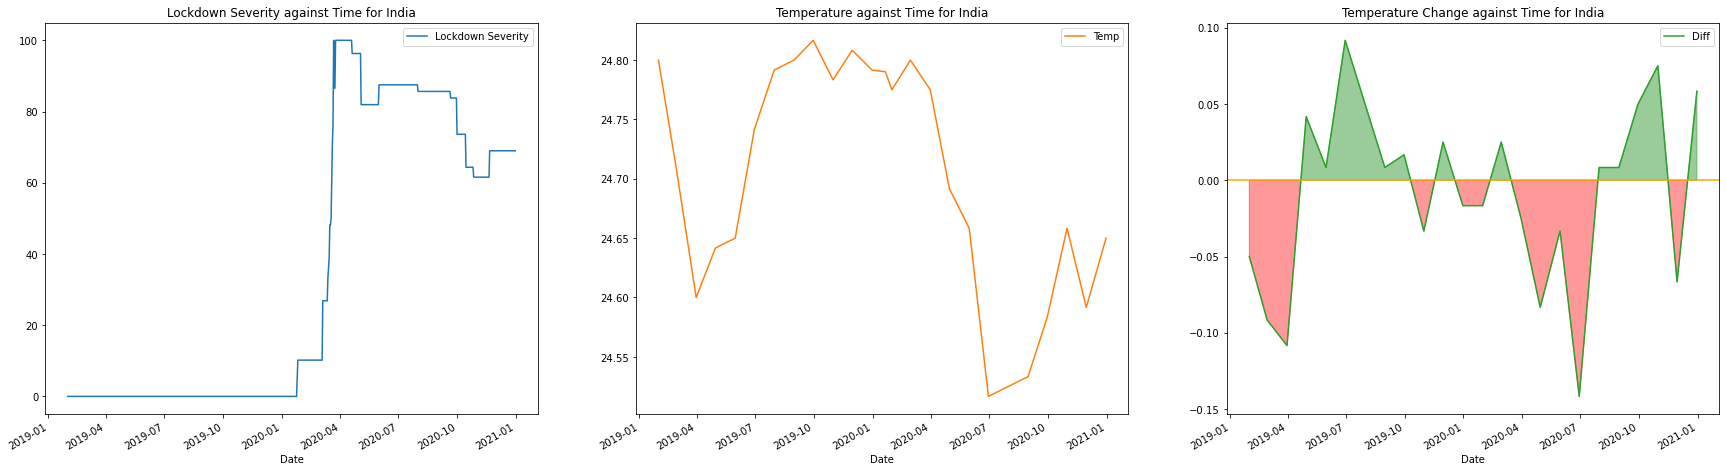

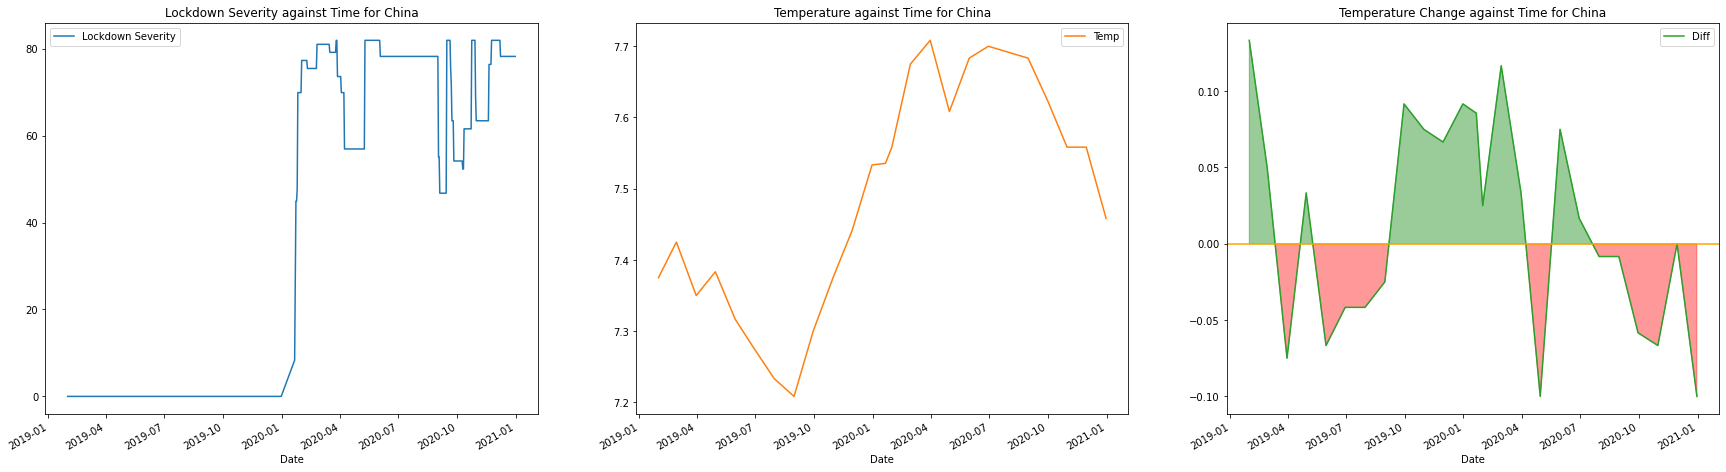

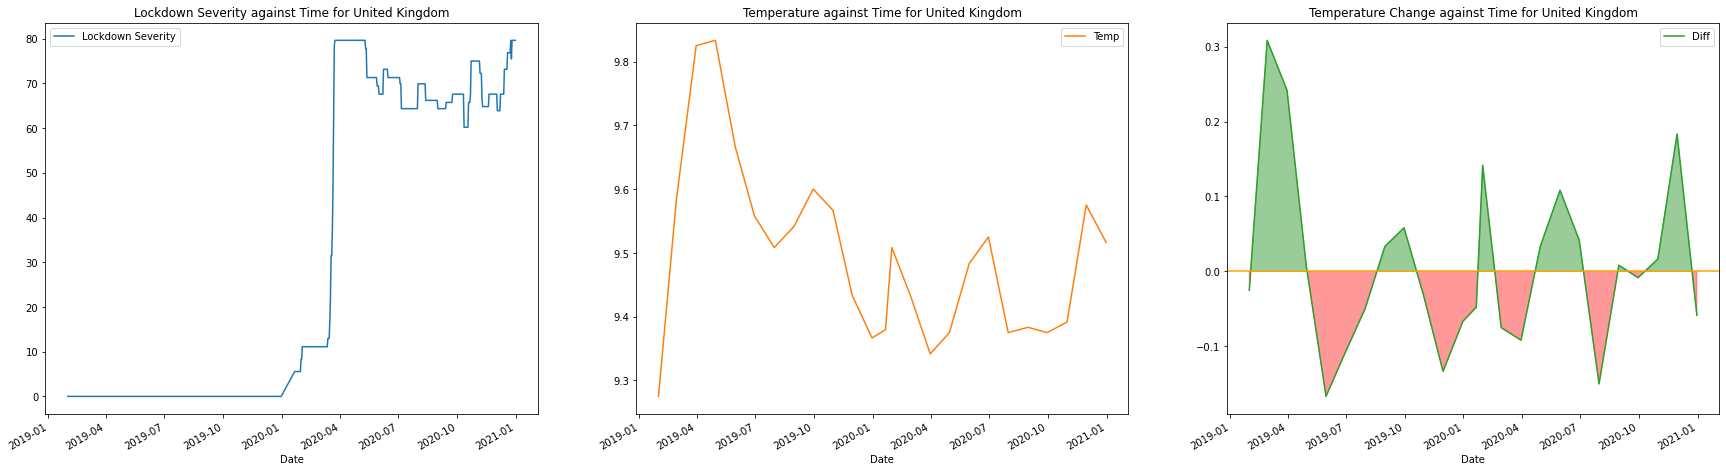

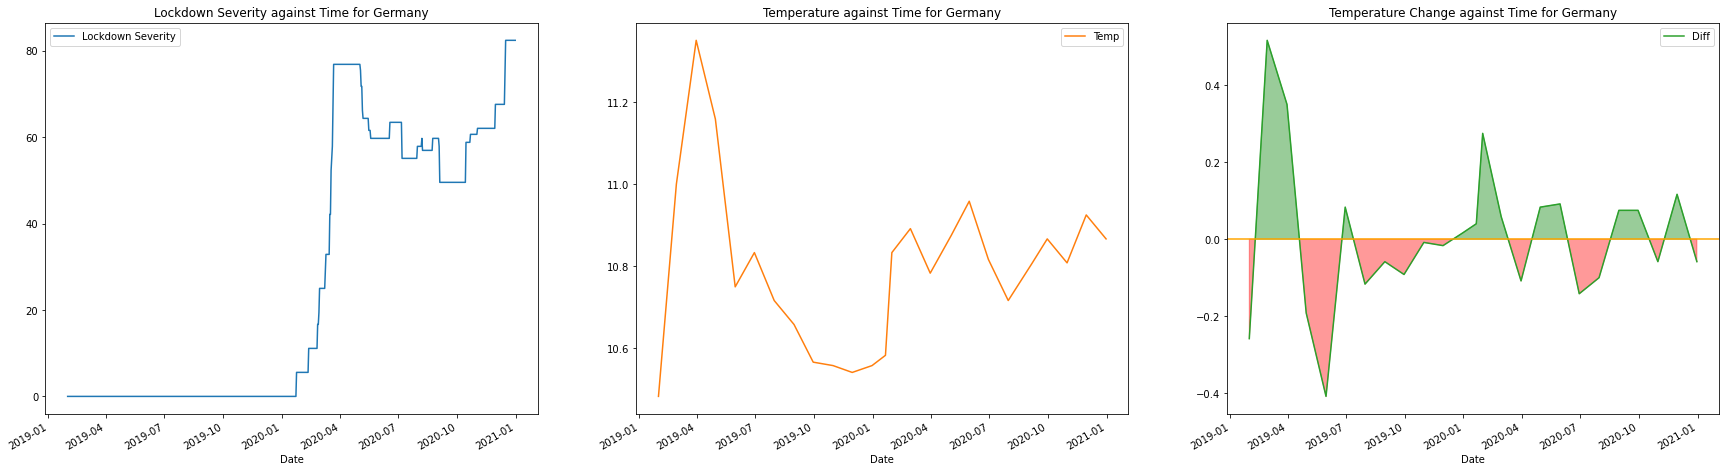

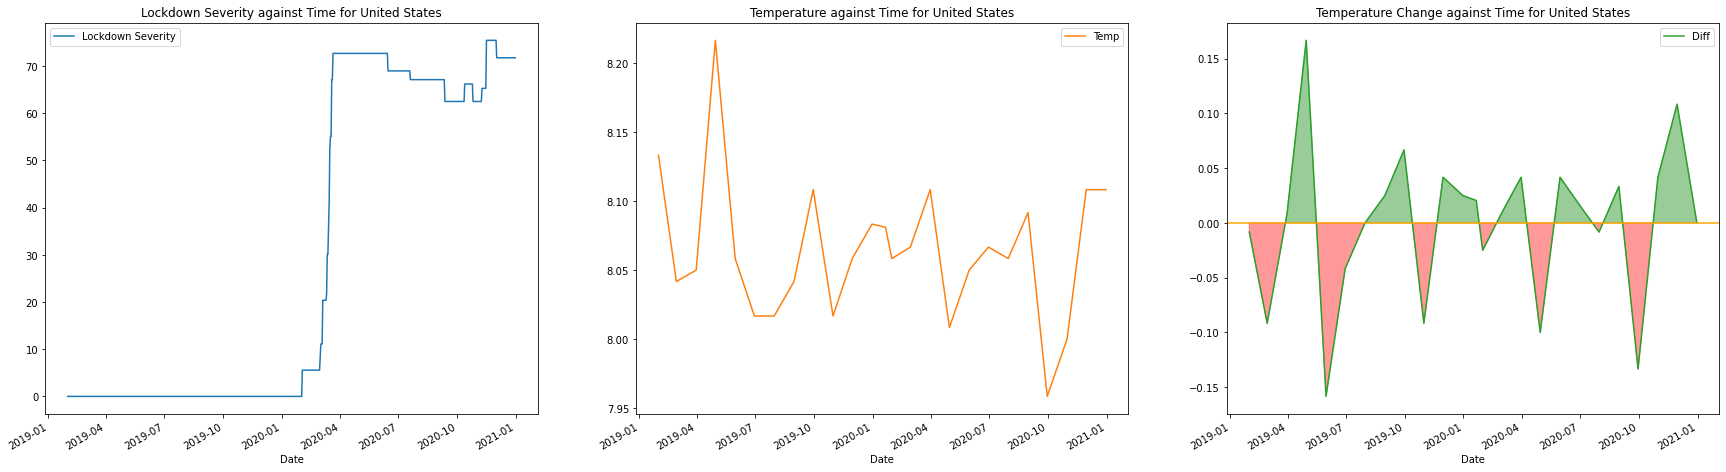

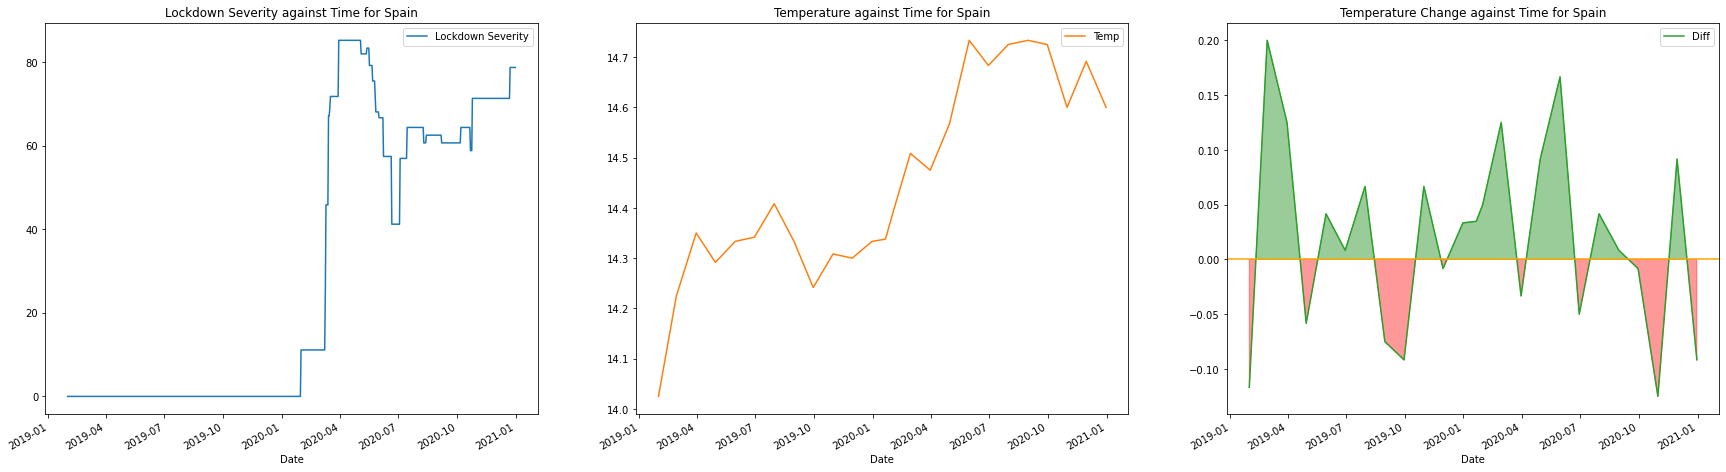

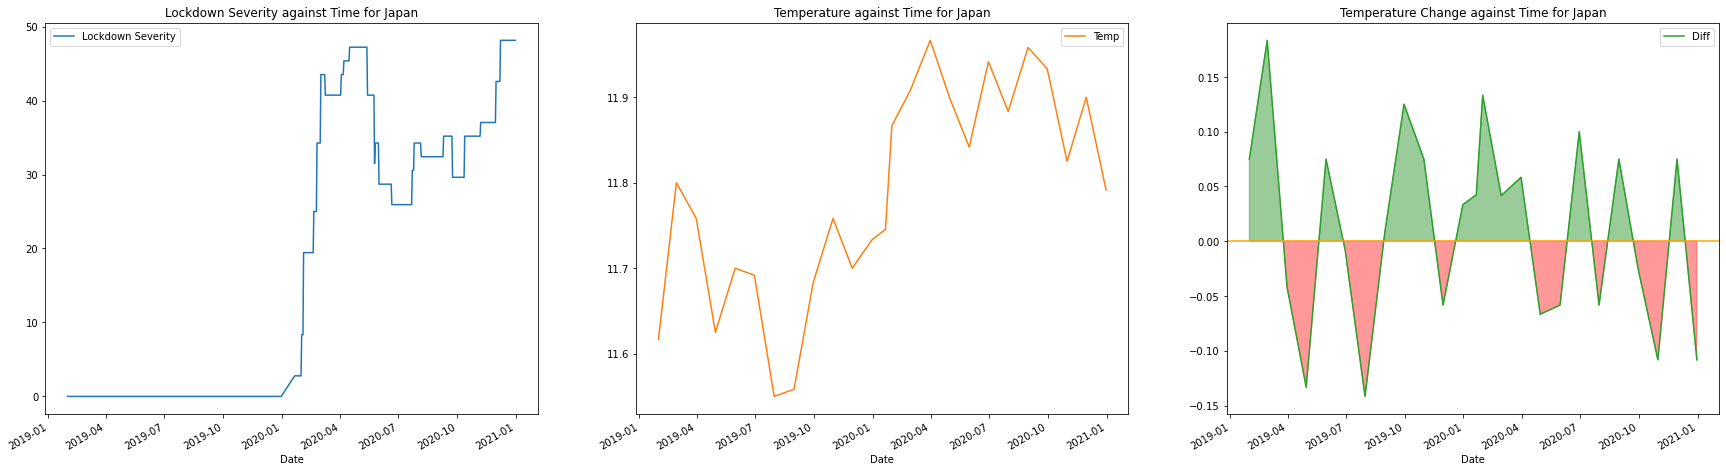

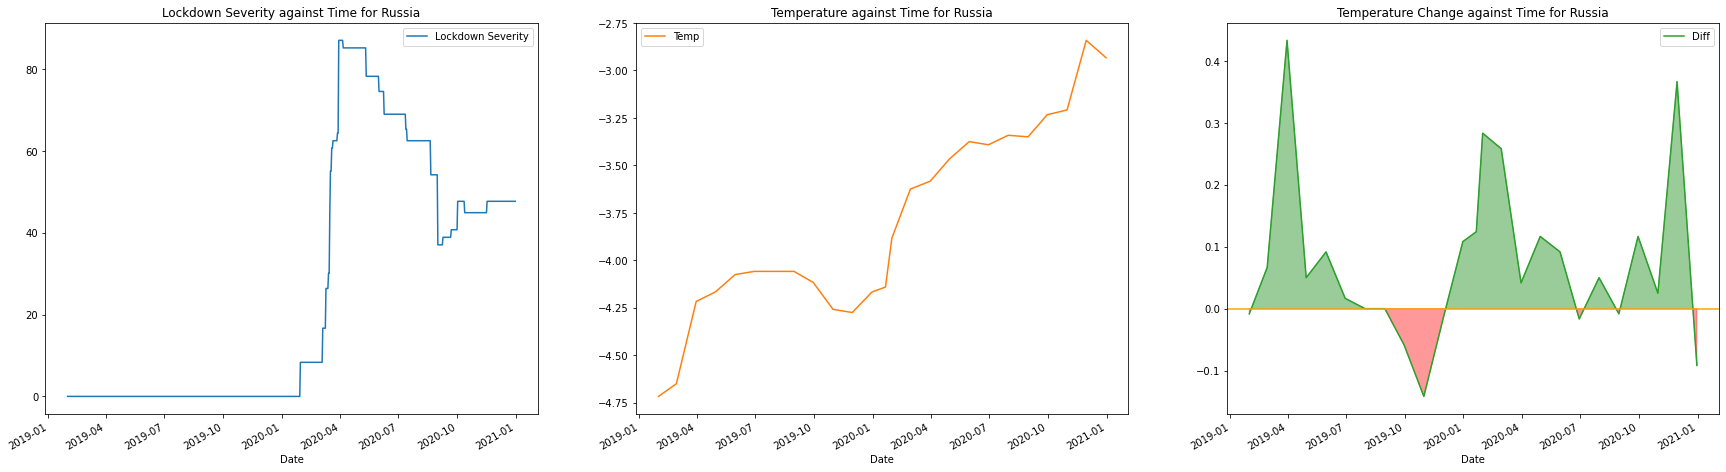

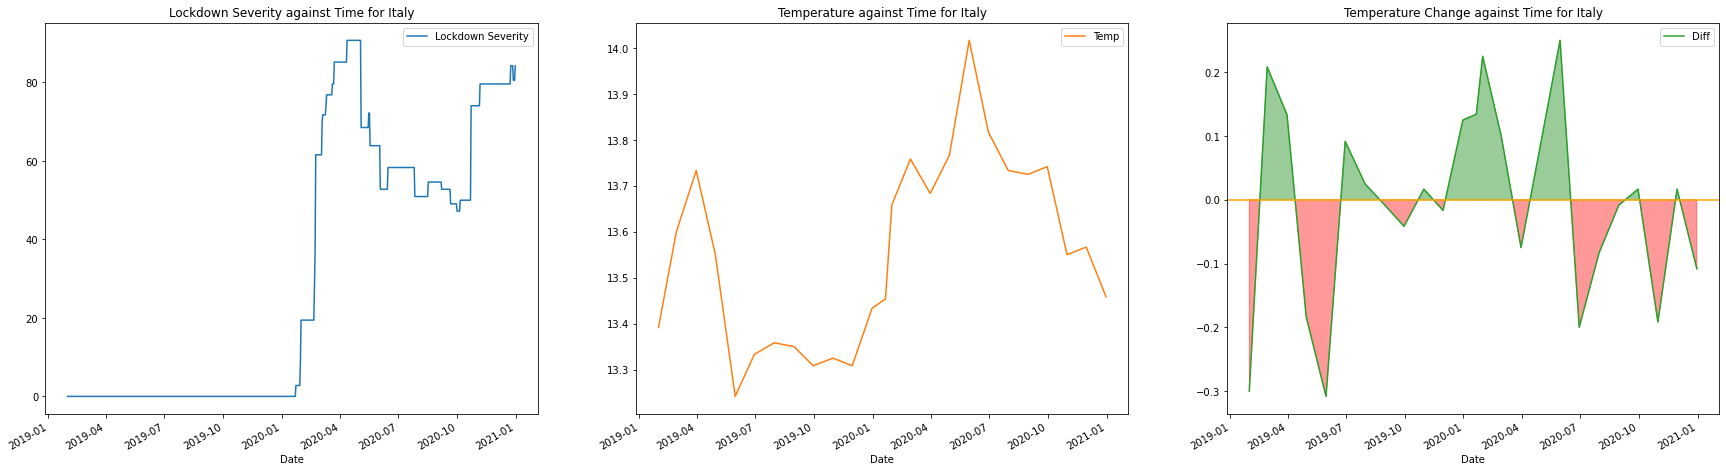

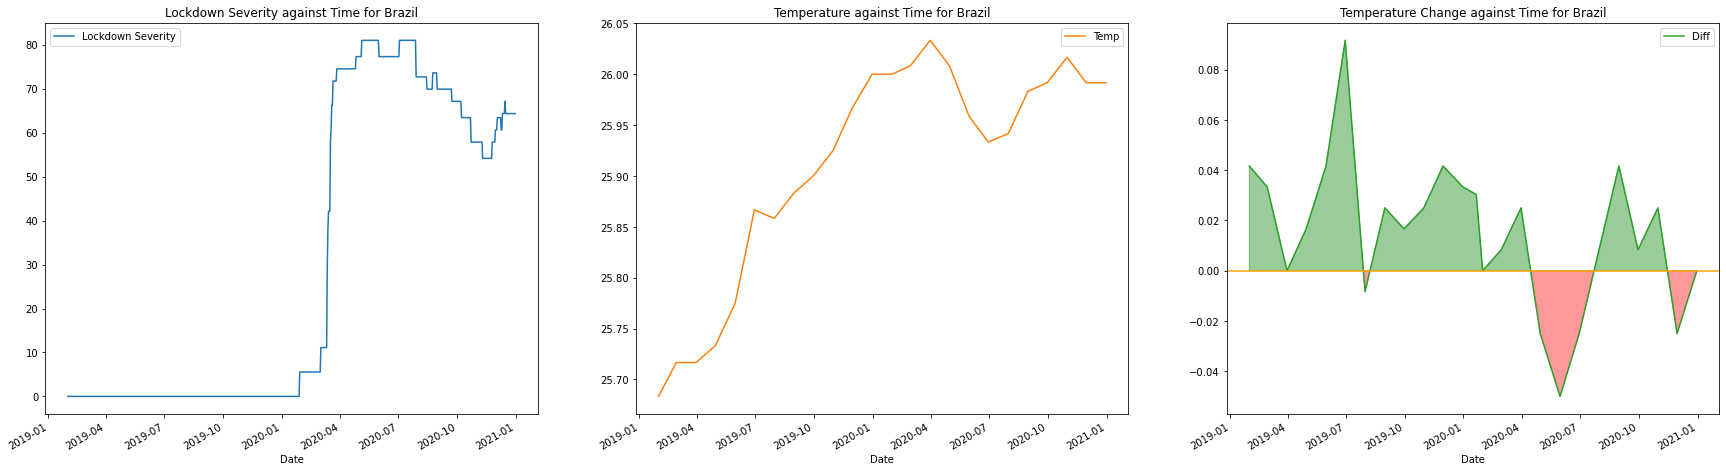

In [27]:
for i in ['France', 'India', 'China', 'United Kingdom', 'Germany', 'United States', 'Spain', 'Japan', 'Russia', 'Italy', 'Brazil']:
    tempAnalysis(
        country = i,
        figsize = (30, 8),
        window_size = 12,
        start_date = "2019"
    )

<a id="Q4"></a>
## **Are lockdowns causing more air pollution?**

Here I plotted a graph of the composite Air Quality Index (AQI), which is found by taking the maximal AQI of the individual AQI of the pollutants.\
Namely:
- CO
- NO<sub>2</sub>
- PM<sub>2.5</sub>
- PM<sub>10</sub>
- O<sub>3</sub>

The median individual AQI is used to compute the composite AQI for each country per day, of which the rolling mean is computated.
Due to the multiple data points with the same day, the median is found for per day.

As merging was performed, the empty data points were linearly interpolated.

<div class="alert alert-block alert-info">
<b>Note:</b> A high AQI implies worse air quality, so a decreasing AQI means improving air quality.
</div>


The below is the colouring scheme of the backdrop of the graph, as a qualitative measure of air quality
<table> 
    <thead> 
        <tr> 
            <td>AQI</td>
            <td>Air Pollution Level</td>
            <td>Health Implications</td>
            <td>Cautionary Statement (for PM2.5)</td> 
        </tr> 
    </thead> 
    <tbody>
        <tr style="background-color:rgba(0, 0, 255, 0.2);"> 
            <td  nowrap="true">0 - 50</td> 
            <td >Good</td> 
            <td >Air quality is considered satisfactory, and air pollution poses little or no risk</td> 
            <td >None</td> 
        </tr> 
        <tr style="background-color:rgba(0, 255, 0, 0.2);" > 
            <td  nowrap="true">51 -100</td> 
            <td >Moderate</td> 
            <td >Air quality is acceptable; however, for some pollutants there may be a moderate health concern for a very small number of people who are unusually sensitive to air pollution.</td> 
            <td >Active children and adults, and people with respiratory disease, such as asthma, should limit prolonged outdoor exertion.</td> 
        </tr> 
        <tr style="background-color:rgba(255, 255, 0, 0.2);"> 
            <td  nowrap="true">101-150</td> 
            <td >Unhealthy for Sensitive Groups</td> 
            <td >Members of sensitive groups may experience health effects. The general public is not likely to be affected.</td> 
            <td >Active children and adults, and people with respiratory disease, such as asthma, should limit prolonged outdoor exertion.</td> 
        </tr> 
        <tr style="background-color:rgba(255,165,0,0.2);"> 
            <td  nowrap="true">151-200</td> 
            <td >Unhealthy</td> 
            <td >Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects</td> 
            <td >Active children and adults, and people with respiratory disease, such as asthma, should avoid prolonged outdoor exertion; everyone else, especially children, should limit prolonged outdoor exertion</td> 
        </tr> <tr style="background-color:rgba(255, 0, 0, 0.2);"> 
        <td  nowrap="true">201-300</td> 
        <td >Very Unhealthy</td> 
        <td >Health warnings of emergency conditions. The entire population is more likely to be affected.</td> 
        <td >Active children and adults, and people with respiratory disease, such as asthma, should avoid all outdoor exertion; everyone else, especially children, should limit outdoor exertion.</td> 
        </tr> 
        <tr style="background-color:rgba(255, 0, 255, 0.2);"> 
            <td  nowrap="true">300+</td> 
            <td >Hazardous</td> 
            <td >Health alert: everyone may experience more serious health effects</td> 
            <td >Everyone should avoid all outdoor exertion</td> 
        </tr> 
    </tbody>
</table>

In [28]:
def airAnalysis(
    start_date = "1990-01-01",
    end_date = "2021-12-31",
    window_size = 1,
    diff_size = 1,
    country = None,
    figsize = (1, 1),
    layout = (3, 1),
    **kwargs
):
    if country == None : # For world data, within the specified period
        country = "The World"
        df = pd.merge(
            # AQI Data
            df_AQI[(df_AQI.Type.isin(["co", 'no2', 'pm25', 'pm10', 'o3']))]\
                .groupby(["ISO2", "Date"])["median"].max().rolling(window_size).mean().reset_index()\
                .groupby("Date")["median"].median(),
            df_Lockdown_Severity.groupby("Date").median(),
            on = "Date",
            how = 'left'
        )

    else : # For country specific data, within the specified period
        df = pd.merge(
            df_AQI[(df_AQI.Type.isin(["co", 'no2', 'pm25', 'pm10', 'o3'])) & (df_AQI.ISO2 == df_can.ISO2[df_can.Country == country].iloc[0])]\
                .groupby(["Date", "City"])["median"].max().rolling(window_size).mean().reset_index()\
                .groupby("Date")["median"].median(),
            df_Lockdown_Severity[df_Lockdown_Severity.Country == country].set_index("Date"),
            on = "Date",
            how = 'left'
        )
    
    # COVID did not exist yet so 0
    df["Lockdown Severity"].fillna(0, inplace = True)
    
    # Calculate the diff    
    df["Diff"] = df.sort_index()["median"].diff(periods = diff_size)
    
    # Interpolating the temperature and its difference
    df["median"] = df["median"].sort_index().interpolate(method='linear', axis=0)

    # Restrict the Period
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    df = df[(df.index <= end_date) & (df.index >= start_date)].sort_index()
    
    f, ax = plt.subplots(layout[0], layout[1], sharex = True, figsize = figsize)
    
    # Graph of Lockdown Severity
    sns.lineplot(
        data = df,
        x = 'Date', y = 'Lockdown Severity',
        ax = ax[0],
        **kwargs
    )
    
    # graph of AQI
    sns.lineplot(
        data = df,
        x = 'Date', y = 'median',
        ax = ax[1],
        **kwargs
    )
    
    # Color the AQI data regions
    ax[1].axhspan(ymin = 0, ymax = 50, color = 'blue', alpha = 0.2)
    ax[1].axhspan(ymin = 50, ymax = 100, color = 'green', alpha = 0.2)
    ax[1].axhspan(ymin = 100, ymax = 150, color = 'yellow', alpha = 0.2)
    ax[1].axhspan(ymin = 150, ymax = 200, color = 'orange', alpha = 0.2)
    ax[1].axhspan(ymin = 200, ymax = 300, color = 'red', alpha = 0.2)
    ax[1].axhspan(ymin = 300, ymax = 1000, color = 'purple', alpha = 0.2)
    
    ax[1].set_ylim(df["median"].min(), df["median"].max())
    
    # graph of AQI change
    sns.lineplot(
        data = df["median"].diff(periods = diff_size),
        ax = ax[2],
        **kwargs
    )
    
    # Color the negative regions    
    ax[2].fill_between(
            df.index,
            df["median"].diff(periods = diff_size),
            0,
            where = df["median"].diff(periods = diff_size) < 0,
            color = 'green',
            alpha = 0.4,
            interpolate = True
        )

    # Color the positive regions   
    ax[2].fill_between(
            df.index,
            df["median"].diff(periods = diff_size),
            0,
            where = df["median"].diff(periods = diff_size) > 0,
            color = 'red',
            alpha = 0.4,
            interpolate = True
        ) 

    # Outline the middle
    ax[2].axhline(y = 0, color = "orange")

    # Graph Titles
    ax[0].set_title(f"Lockdown Severity against Time for {country}")
    ax[1].set_title(f"Air Quality against Time for {country}")
    ax[2].set_title(f"Air Quality Change against Time for {country}")
    
    return ax


array([<AxesSubplot:title={'center':'Lockdown Severity against Time for The World'}, xlabel='Date', ylabel='Lockdown Severity'>,
       <AxesSubplot:title={'center':'Air Quality against Time for The World'}, xlabel='Date', ylabel='median'>,
       <AxesSubplot:title={'center':'Air Quality Change against Time for The World'}, xlabel='Date', ylabel='median'>],
      dtype=object)

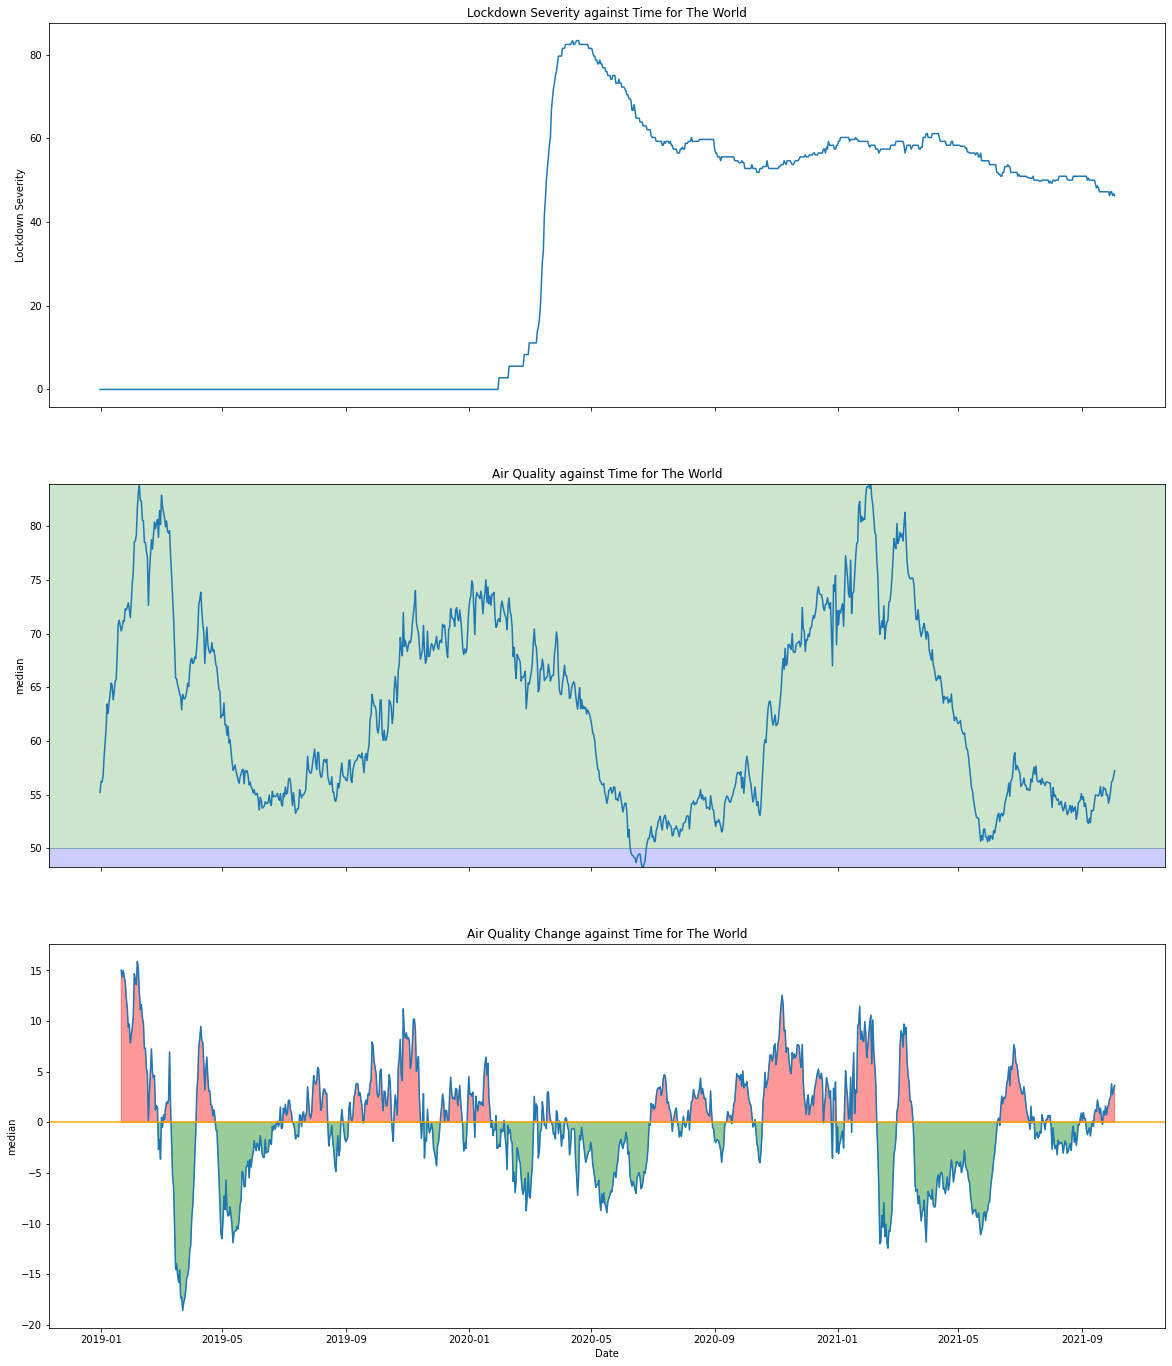

In [29]:
airAnalysis(window_size = 21, figsize = (20, 24), diff_size = 21)

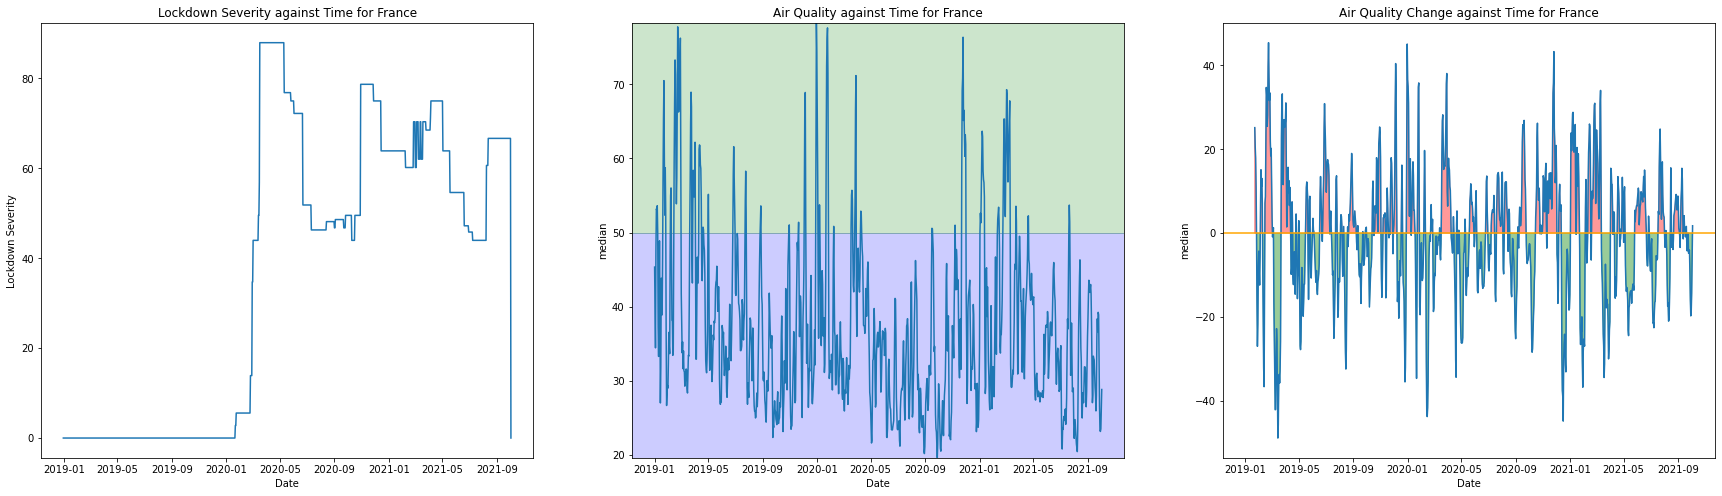

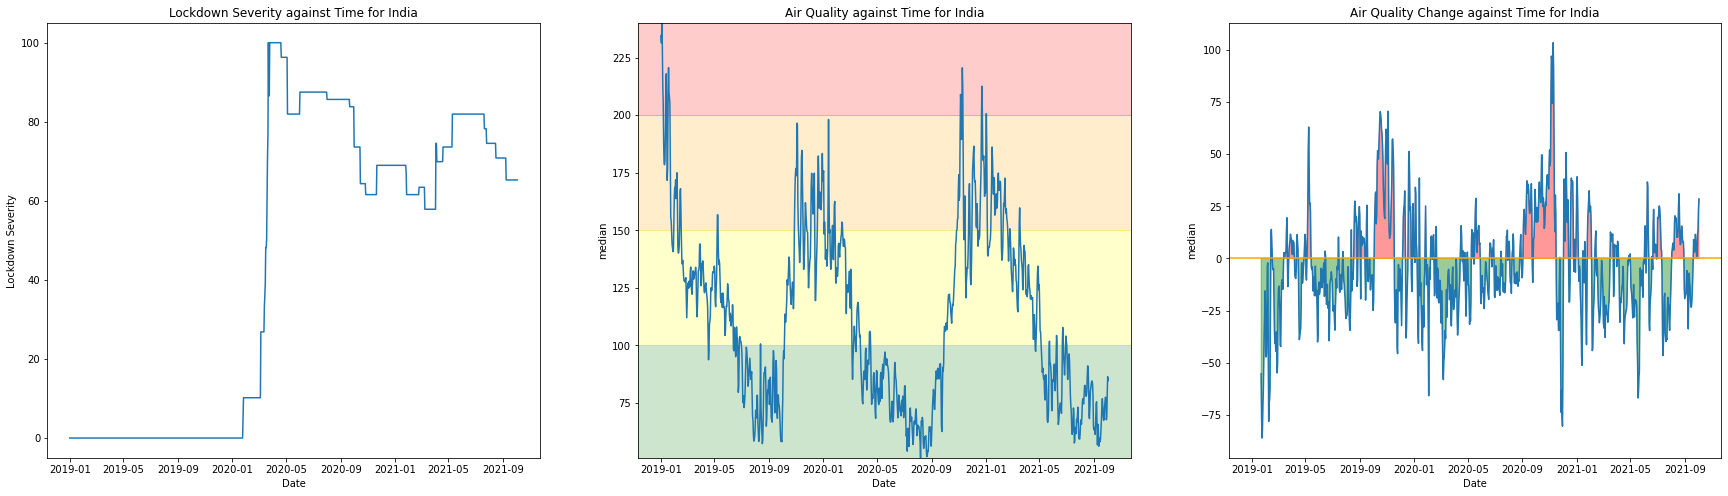

In [ ]:
for country in ['France', 'India', 'China', 'United Kingdom', 'Germany', 'United States', 'Spain', 'Japan', 'Russia', 'Italy', 'Brazil']:
    airAnalysis(window_size = 31, figsize = (30, 8), diff_size = 21, country = country, layout = (1, 3))

# Results Discussion

Present and discuss your research results. Treat each of your research questions separately. Focus in particular on the results that are most interesting, surprising, or important. Discuss the consequences or implications. Interpret the results: if the answers are unexpected, then see whether you can find an explanation for them, such as an external factor that your analysis did not account for. Include some visualization of your results (a graph, plot, bar chart, etc.). These plots should be created programmatically in the code you submit.

## Are lockdowns causing more CO<sub>2</sub> emissions?
Very interestingly, the total amount of CO<sub>2</sub> Emissions actually decrease, even in the power and residential sectors. \
I believed that CO<sub>2</sub> emissions will increase as more people stay home, or have a stricter lockdown. Because as more people stay home, they will use more electricity and more power, increasing emissions in the power and residential sectors.

After looking at the data, there is almost no correlation between the amount of CO<sub>2</sub> emissions in any sector and the lockdown severity index. \
However, there is a very interesting pattern that appears in all the data.

(-0.4653580392938055, 1.5085363979073132e-24)

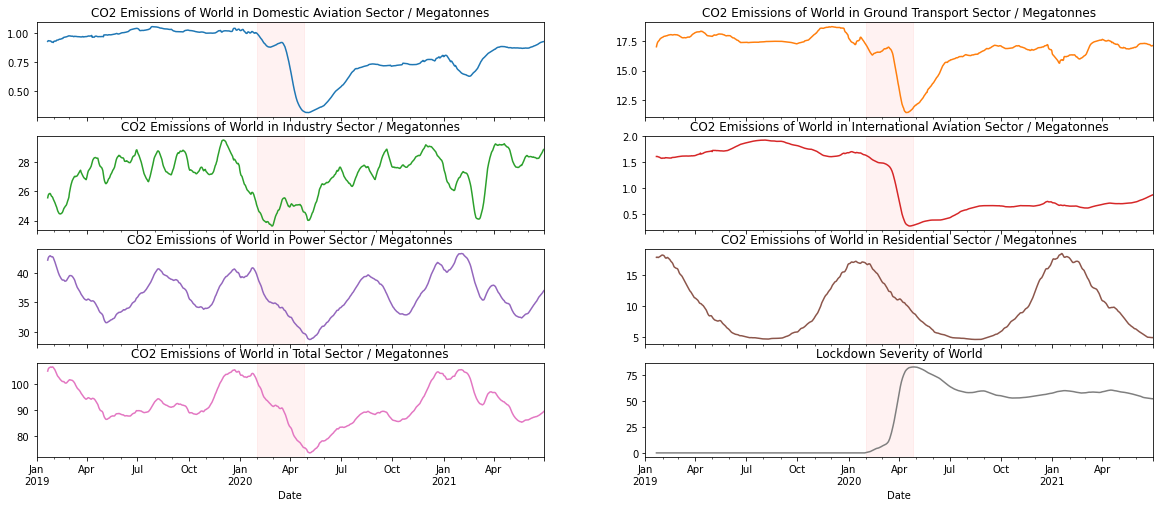

<Figure size 432x288 with 0 Axes>

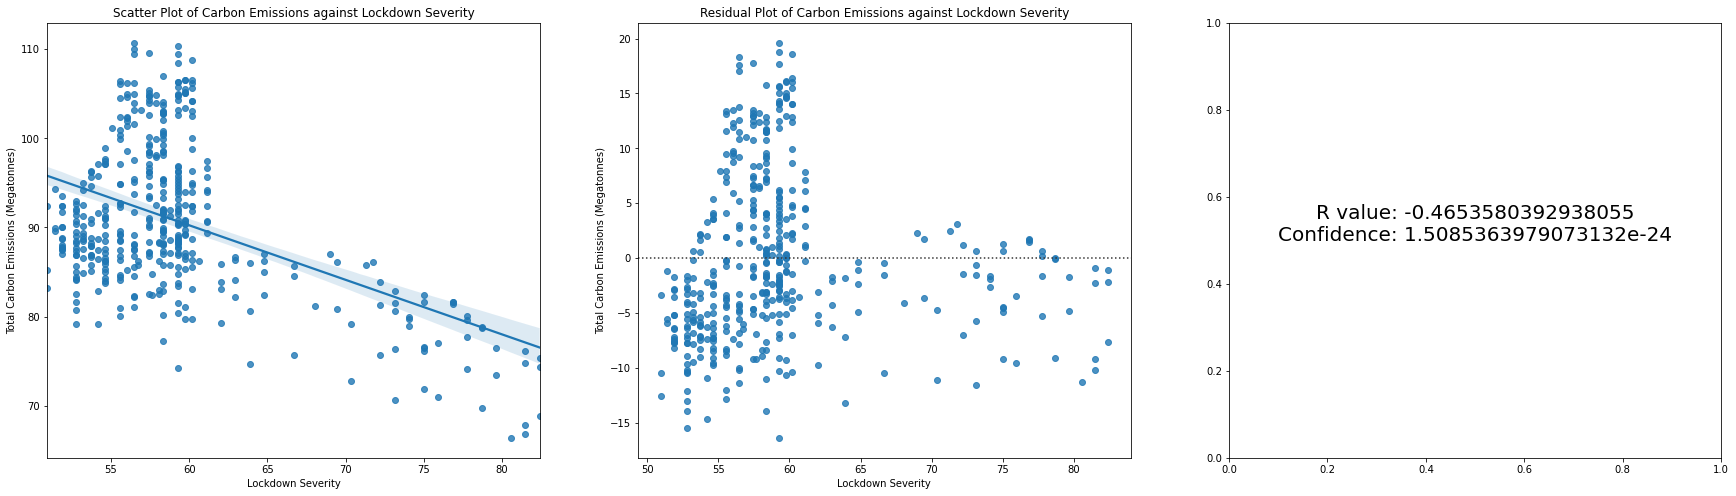

In [31]:
emissionsAnalysis(
    initial_start = "2020-02-01",
    initial_end = "2020-04-26",
    window_size = 21,
    legend = None,
    figsize = (20, 8)
)

During the initial phase of the COVID-19, highlighted in red, the carbon emissions decreases very significantly across most sectors, and in some countries, all sectors. \
The initial phase is when the lockdown severity sharply rose from 0 to the value at the peak of the pandemic for most countries.\
Sadly, The correlation of carbon emissions and lockdown severity is weak as shown by the R value given.

In [32]:
px.timeline(
    df_emissions_analysis.sort_values("Start Date"),
    x_start = "Start Date",
    x_end = "End Date",
    y = "Country",
    color = "CO2 Drop (Megatonnes)",
    color_continuous_scale = 'Oryel',
    title = "Drop in CO2 Emissions of each Country",
).update_yaxes(autorange = "reversed")

For some unknown reason, China dropped its CO<sub>2</sub> emissions a lot more than the other countries, evident from the graph.
It could be that it dropped first, due to the fact that COVID-19 first appeared there in 2019. \
It could be that China has a lot of people in the production sector, resulting in a massive drop when most factories had to be shut down

(-1.0, 1.0)

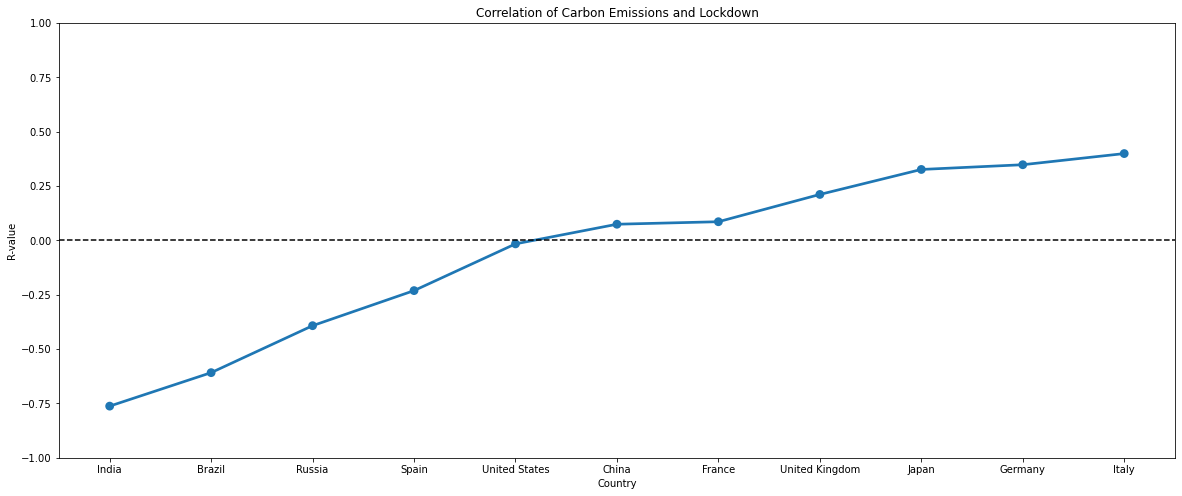

In [33]:
plt.figure(figsize = (20, 8))
sns.pointplot(
    data = df_emissions_analysis.sort_values("R-value"),
    x = "Country",
    y = "R-value"
)

plt.title("Correlation of Carbon Emissions and Lockdown")

plt.axhline(0, linestyle = "--", color = 'k')
plt.ylim(top = 1.0, bottom = -1.0)

The correlation measured is based on data after the initial rise of COVID-19, and it shows how the correlation is either weak or negative.
This could be due to
- Them being developing countries, but China showed a weak correlation, with r value ≈0.
- Their COVID-19 situation, as I did not consider the number of COVID cases as a variable. India and Brazil still have a very high number of daily new cases.
- There could be an external factor, making this a multiple linear regession

## Are lockdowns increasing deforestation?

array([<AxesSubplot:title={'center':'Lockdown Severity against Time for World'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'Forest Area against Time for World'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'Forest Area Change against Time for World'}, xlabel='Date'>],
      dtype=object)

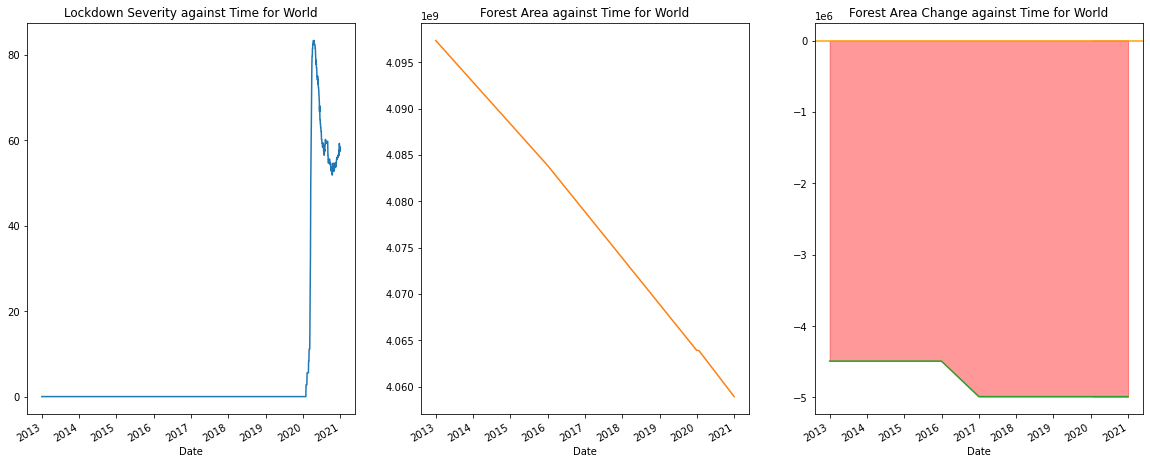

In [34]:
forestAnalysis(
    start_year = "2012",
    end_year = "2021",
    figsize = (20, 8),
    legend = None
)

It seems that COVID-19 has little effect on the deforestation. The forest change and forest are consistent with preious years for all countries and the world as a whole.
This could be that COVID-19's impact on deforestation will be see in the future, after the lockdowns are over.\
It could also be that the impact is minute, and a monthly dataset instead of a yearly dataset could show its impacts.

However, we can see from the graph that the total forest area has been decreasing, at a decreasing rate.\
We need to do something about this!

## Does lockdowns increase global temperatures?

While most countries showed an increase in temperature during the initial COVID phase, it is not consistent with the carbon emission levels.

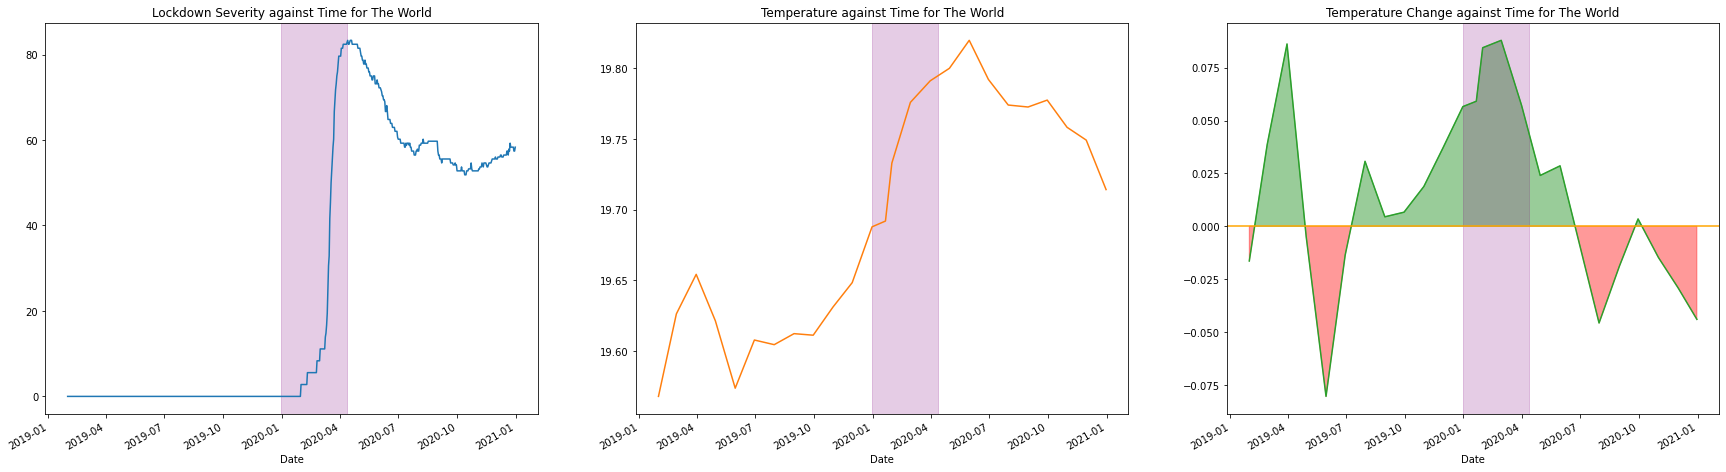

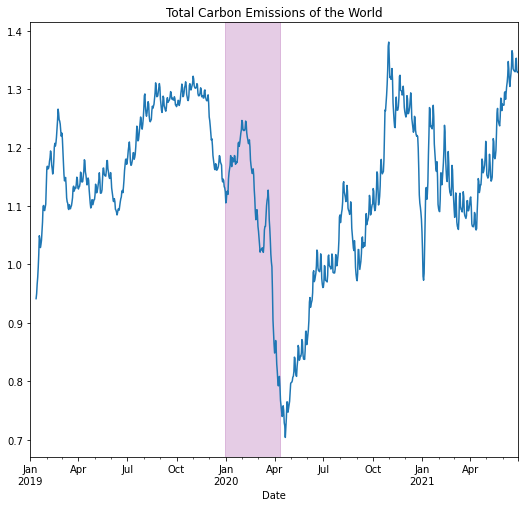

In [35]:
for i, graph in enumerate(tempAnalysis(
    start_date = "2019",
    diff_size = 2,
    window_size = 12,
    figsize = (30, 8),
    legend = None
)):
    graph.axvspan(xmin = "2019-12-31", xmax = "2020-04-12", color = "purple", alpha = 0.2)
    
pd.merge( # Merging the carbon emissions with the data severity
    df_CarbonEmissions[df_CarbonEmissions.Country == country].pivot_table(index = 'Date', columns = 'Sector', values = 'Emissions'),
    df_Lockdown_Severity[df_Lockdown_Severity.Country == country] if country != "World"
    else df_Lockdown_Severity.groupby("Date").median().reset_index(),
    on = "Date",
    how = 'left'
).set_index("Date").rolling(12).mean().plot(
    y = "Total",
    figsize = (8.75, 8),
    legend = None,
    title = "Total Carbon Emissions of the World"
).axvspan(xmin = "2019-12-31", xmax = "2020-04-12", color = "purple", alpha = 0.2)

The purple region highlighted the initial COVID phase, and one can see that when the carbon emissions decrease, the temperature increases.
This is a bit the weird as normally carbon emissions are supposed to correlate positivly with the temperature.
This is due to the fact that with more carbon emissions, there are more greenhouse gases and the temperature will increase.

This could be just a coincidence as during this season of January to April, it is transitioning from one season to another, causing a spike in temperatures and changing it more significantly than the drop in emissions.

Carbon emissions could take time to build up and affect global temperatures, so the sharp decrease in carbon emissions could reduce temperature fluctuations or temperature changes in future years.

## Are lockdowns causing more air pollution?

The change in Air Quality seems to be following a seasonal cycle. While it is true that the air quality has gotten better, it wsa probably part of this seasonal cycle and was not related to the lockdowns. This is evident as even during the lockdown period, the air quality deproved again, instead of improving.

# Conclusion and recommendations

Most of the analysis done showed no correlation. This could be due to the fact that most of the impacts of COVID-19 on the envrionment takes time to show itself, like the decrease in CO<sub>2</sub> emissions during the initial phase of the pandemic will take time before it starts to impact the climate around us.

This analysis should be done when all countries are declared clear of COVID-19, or when it becomes an endemic instead of a pandemic. This is because when that happens, sufficient time would have passed and the impacts will be more apparent, as the real impacts of COVID-19 may be hard to tell especially when it is still ongoing and can impact our environment further.

# Appendix

## AQI Temperature Data

The AQI Dataset is *huge*, it contains not just the AQI of the countries but other information about their data too.
The list of data provided is shown below

|Dataset Given by AQI|
|:------------------:|
|Temperature|
|Humidity|
|Pressure|
|Wind Speed|
|PM<sub>2.5</sub>|
|NO<sub>2</sub>|
|PM<sub>10</sub>|
|O<sub>3</sub>|
|Dew|
|SO<sub>2</sub>|
|CO|
|Wind Gust|
|Precipitation|
|wd|
|AQI|
|UVI|
|POL|
|PM<sub>1</sub>|
|neph|
|mepaqi|

Even I do not know what to do with some of the data given, or even understand what they mean.

But the temperature data could have been used, it is better than the other set as it gave a almost daily record instead of a monthly one.

In order to use the AQI to plot, I used the median value given instead of the max, min, count or variance as it gives the most accurate description of the datapoint.\
To process, I found the median temperature of each day and paired it to the lockdown severity, linearly interpolating all the gaps.

In [36]:
def tempAnalysis2(
    start_date = "1990-01-01",
    end_date = "2020-12-31",
    window_size = 1,
    diff_size = 1,
    country = None,
    **kwargs
):
    
    if country == None : # For world data
        country = "World"
        df = pd.merge(
            # Temp Data from AQI + some processing
            df_AQI[(df_AQI.Type == "temperature")]\
                .groupby("Date")["median"].median().rolling(window_size).mean(),
            # Lockdown severity
            df_Lockdown_Severity.groupby("Date").median(),
            on = "Date",
            how = 'left'
        )

    else : # For country specific data
        df = pd.merge(
            # Temp data from AQI + some processing
            df_AQI[(df_AQI.Type == "temperature") & (df_AQI.ISO2 == df_can.ISO2[df_can.Country == country])]\
                .groupby("Date")["median"].median().rolling(window_size).mean(),
            # Lockdown severity
            df_Lockdown_Severity[df_Lockdown_Severity.Country == country].set_index("Date"),
            on = "Date",
            how = 'left'
        )

    df.rename(columns = {"median": "Temp"}, inplace = True)

    # Calculate the diff    
    df["Diff"] = df.Temp.diff(periods = diff_size)

    # Interpolating the temperature and its difference
    df.Temp = df.Temp.sort_index().interpolate(method='linear', axis=0)
    df.Diff = df.Diff.sort_index().interpolate(method='linear', axis=0)

    # COVID did not exist yet so 0
    df["Lockdown Severity"].fillna(0, inplace = True)

    # Restrict the Period
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    df = df[(df.index <= end_date) & (df.index >= start_date)].sort_index()
    
    # Plotting the graph
    ax = df[["Lockdown Severity", "Temp", "Diff"]].plot(
        kind = 'line', 
        subplots = True,
        layout = (1, 3),
        sharex = True,
        **kwargs
    ).flatten()

    # Color the negative regions    
    ax[2].fill_between(
            df.index,
            df.Diff,
            0,
            where = df.Diff < 0,
            color = 'red',
            alpha = 0.4,
            interpolate = True
        )

    # Color the positive regions   
    ax[2].fill_between(
            df.index,
            df.Diff,
            0,
            where = df.Diff > 0,
            color = 'green',
            alpha = 0.4,
            interpolate = True
        ) 

    # Outline the middle
    ax[2].axhline(y = 0, color = "orange")

    # Graph Titles
    ax[0].set_title(f"Lockdown Severity against Time for {country} using AQI Dataset")
    ax[1].set_title(f"Temperature against Time for {country} using AQI Dataset")
    ax[2].set_title(f"Temperature Change against Time for {country} using AQI Dataset")

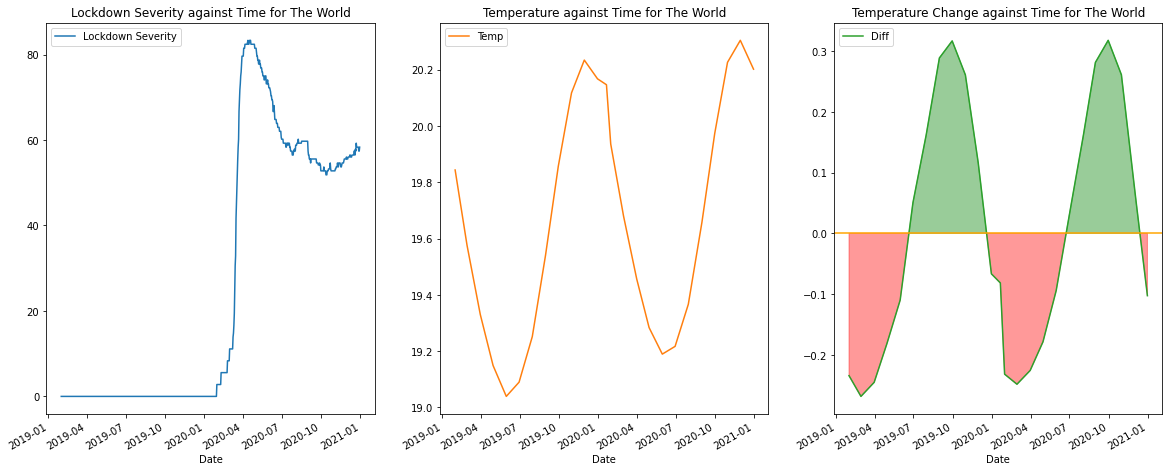

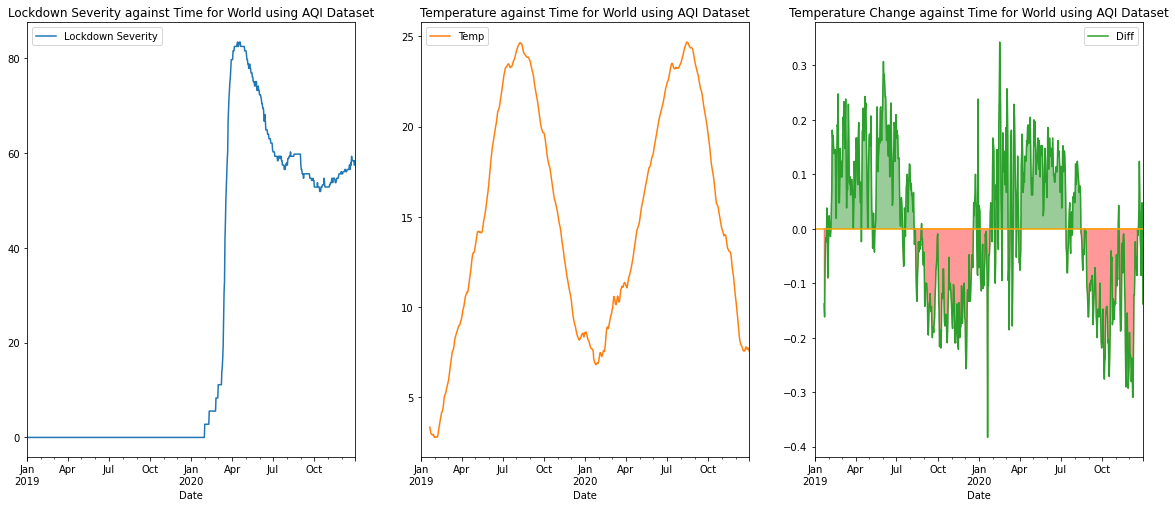

In [37]:
tempAnalysis(
    figsize = (20, 8),
    window_size = 21,
    start_date = '2019',
    end_date = "2020-12-31"
)
tempAnalysis2(
    figsize = (20, 8),
    window_size = 21,
    end_date = "2020-12-31"
)

Suprisingly, the AQI recorded temperature appears to follow a cycle that is opposite that of the data provided by the world bank.

In [38]:
# Generate Choropleth using the number of data points from the country
px.choropleth(
    df_AQI[df_AQI.Type == "temperature"].ISO2.value_counts().reset_index(),
    locations = pd.merge(df_AQI[df_AQI.Type == "temperature"], df_can, on = "ISO2").Country.value_counts().index,
    locationmode = "country names",
    color_continuous_scale = 'YlOrRd', 
    color = "ISO2",
    labels = {"ISO2": 'Data Source'}
).update_layout(
    margin={"r":0,"t":0,"l":0,"b":0}, 
    title_text='Number of Temperature Data points in AQI Dataset',
).show()

Now it is apparent why that would be the case, most of the data set came from countries in the northern hemisphere, while there are more countries in the southern hemisphere. This results in the AQI data being skewed, and showed the northern hemisphere data instead of the a more balanced trend.